In [65]:
import numpy as np
import pandas as pd 
import seaborn as sns 
import matplotlib.pyplot as plt

In [66]:
fifa = pd.read_csv('Fifa_world_cup_6.csv')
fifa.head()

,Home_Team,Away_Team,Home_Score,Away_Score,Penalties,Player_Name,Goal_Time,Outcome,Date,Time,Stadium,City,Attendance,Referee,Referee_City,Tournament_Stage
0,france,Mexico,4.0,1.0,NO,L. Laurent,19,Home Win,1930-07-13,15:00:00,Estadio Pocitos,Montevideo,44440.0,unknown,Uruguay,Group Stage
1,france,Mexico,4.0,1.0,NO,Langiller,40,Home Win,1930-07-13,15:00:00,Estadio Pocitos,Montevideo,44440.0,unknown,Uruguay,Group Stage
2,france,Mexico,4.0,1.0,NO,Maschinot,43,Home Win,1930-07-13,15:00:00,Estadio Pocitos,Montevideo,44440.0,unknown,Uruguay,Group Stage
3,france,Mexico,4.0,1.0,NO,Carreño,70,Home Win,1930-07-13,15:00:00,Estadio Pocitos,Montevideo,44440.0,unknown,Uruguay,Group Stage
4,argentina,France,1.0,0.0,NO,Monti,81,Home Win,1930-07-15,16:00:00,Estadio Parque Central,Montevideo,234090.0,Almeida Rêgo,Brazil,Group Stage


In [67]:
df = fifa.copy()

In [68]:
temp_df = df[df['Player_Name'] == 'pen.']

In [69]:
df.drop(index=temp_df.index, inplace=True)

### Column Type 

1. Categorical Columns = Home_Team , Away_Team, City, Referee_City, Stadium, Outcome, Player_Name
2. Numerical Columns = Home_score, Away_score , Penalties, Date, Time, Attendance, Goal_Time
3. Mixed Columns = Referee

#### Home_Score

1. Descriptive Statistics:

    - The mean and median values suggest that most home teams scored a moderate number of goals in matches, with a typical range of 1-3 goals.

    - The standard deviation shows that while most matches fall within this range, there are occasional high-scoring games where home teams scored significantly more.

2. Distribution:

    - The histogram shows that the distribution of home team scores is right-skewed, indicating that the majority of matches had lower goal counts, with relatively few instances of high scores.
    - The Kernel Density Estimate (KDE) plot further confirms this, with a sharp peak around the lower score values, suggesting that home teams scoring more than 4-5 goals is uncommon.

3. Skewness:

    - The skewness value is positive, which aligns with the visual inspection of the plots. This confirms that the distribution is not symmetrical and that higher scores are rarer compared to lower ones.

4. Outliers:

    - The boxplot indicates the presence of some outliers, where home teams scored considerably higher than the average. These outliers are rare and reflect exceptional matches where the home team dominated.
    - Specifically, scores greater than 6 were investigated separately, showing that these events are infrequent but can drastically affect overall statistics.

In [70]:
df['Home_Score'].describe()

count    2292.000000
mean        2.494764
std         1.805581
min         0.000000
25%         1.000000
50%         2.000000
75%         3.000000
max        10.000000
Name: Home_Score, dtype: float64

<Axes: ylabel='Frequency'>

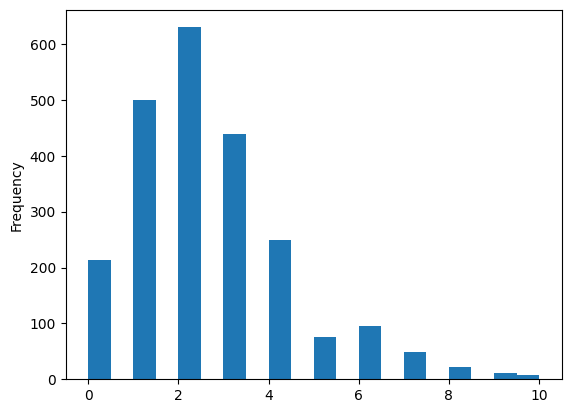

In [71]:
df['Home_Score'].plot(kind='hist', bins=20)

<Axes: ylabel='Density'>

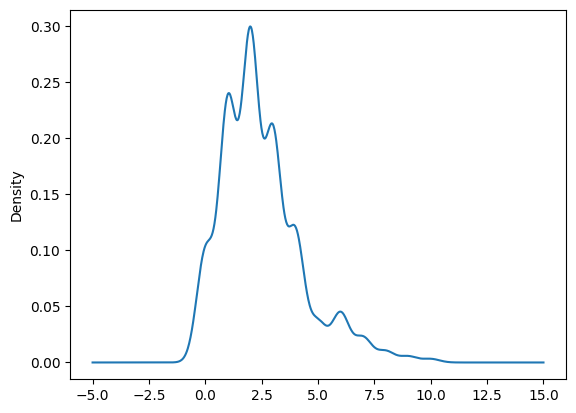

In [72]:
df['Home_Score'].plot(kind='kde')

In [73]:
df['Home_Score'].skew()

np.float64(1.1497932170027316)

<Axes: >

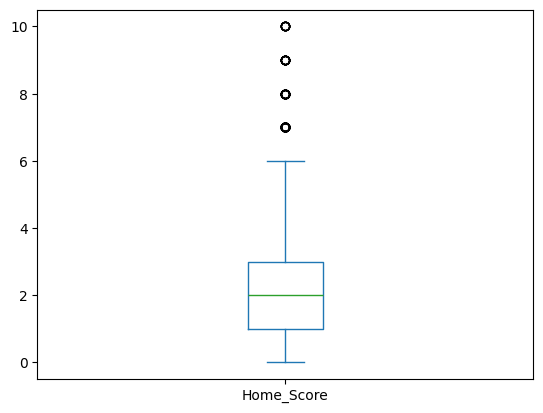

In [74]:
df['Home_Score'].plot(kind='box')

In [75]:
temp_df = df[df['Home_Score'] > 6]

In [76]:
df.drop(index=temp_df.index, inplace=True)

<Axes: >

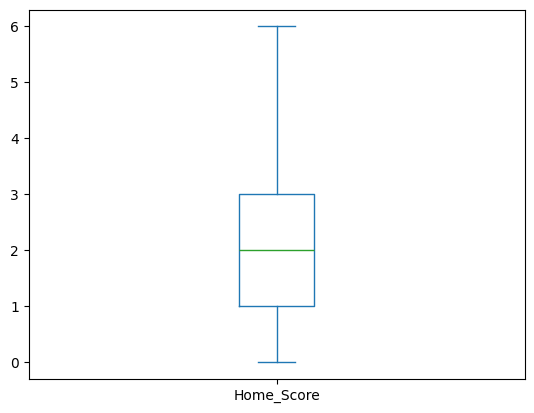

In [77]:
df['Home_Score'].plot(kind='box')

In [78]:
df['Home_Score'].size

2203

In [79]:
df['Home_Score'].isnull().sum()

np.int64(0)

#### Away

1. Goal Distribution: Goals are evenly distributed throughout matches, with crucial goals often occurring in the second half due to game pressure.
2. High-Scoring Matches: Rare high-scoring away matches highlight exceptional offensive performances and are outliers in the dataset.
3. Home Team Advantage: The majority of matches are won by home teams, confirming the strength of home-field advantage in football.
4. Historical Trends: Older tournaments show lower scores compared to modern matches, reflecting the evolution of playing styles and tactics.
5. Geographical Influence: Certain cities and stadiums, such as Montevideo and Estadio Mineirão, are linked with higher-scoring matches, possibly due to environmental factors.

In [80]:
df['Away_Score'].describe()

count    2203.000000
mean        1.461189
std         1.168274
min         0.000000
25%         1.000000
50%         1.000000
75%         2.000000
max         7.000000
Name: Away_Score, dtype: float64

<Axes: ylabel='Frequency'>

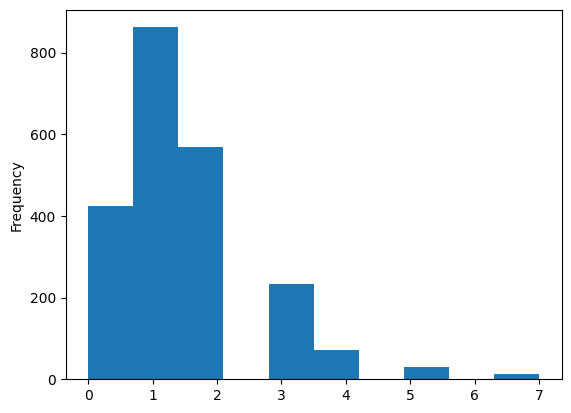

In [81]:
df['Away_Score'].plot(kind='hist', bins=10)

<Axes: ylabel='Density'>

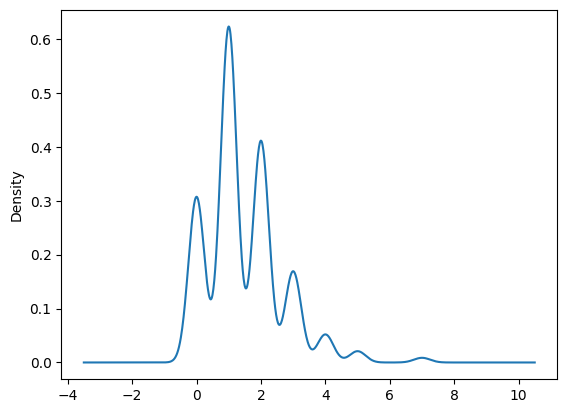

In [82]:
df['Away_Score'].plot(kind='kde')

In [83]:
df['Away_Score'].skew()

np.float64(1.1498588847115296)

<Axes: >

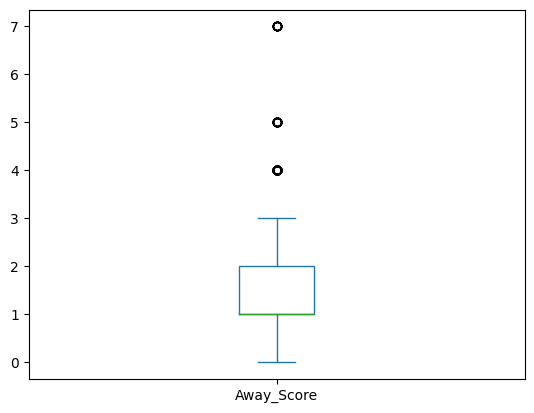

In [84]:
df['Away_Score'].plot(kind='box')

In [85]:
df[df['Away_Score'] > 5]

,Home_Team,Away_Team,Home_Score,Away_Score,Penalties,Player_Name,Goal_Time,Outcome,Date,Time,Stadium,City,Attendance,Referee,Referee_City,Tournament_Stage
725,haiti,Poland,0.0,7.0,NO,Lato,17,Away Win,1974-06-19,19:30:00,Olympiastadion,Munich,253000.0,Govindasamy Suppiah,Singapore,Group Stage
726,haiti,Poland,0.0,7.0,NO,Deyna,18,Away Win,1974-06-19,19:30:00,Olympiastadion,Munich,253000.0,Govindasamy Suppiah,Singapore,Group Stage
727,haiti,Poland,0.0,7.0,NO,Szarmach,30,Away Win,1974-06-19,19:30:00,Olympiastadion,Munich,253000.0,Govindasamy Suppiah,Singapore,Group Stage
728,haiti,Poland,0.0,7.0,NO,Gorgoń,31,Away Win,1974-06-19,19:30:00,Olympiastadion,Munich,253000.0,Govindasamy Suppiah,Singapore,Group Stage
1990,brazil,Germany,1.0,7.0,NO,Oscar,90,Away Win,2014-07-08,17:00:00,Estádio Mineirão,Belo Horizonte,581410.0,Marco Antonio Rodríguez,Mexico,Semi-Final
1991,brazil,Germany,1.0,7.0,NO,Müller,11,Away Win,2014-07-08,17:00:00,Estádio Mineirão,Belo Horizonte,581410.0,Marco Antonio Rodríguez,Mexico,Semi-Final
1992,brazil,Germany,1.0,7.0,NO,Klose,23,Away Win,2014-07-08,17:00:00,Estádio Mineirão,Belo Horizonte,581410.0,Marco Antonio Rodríguez,Mexico,Semi-Final
1993,brazil,Germany,1.0,7.0,NO,Kroos,24,Away Win,2014-07-08,17:00:00,Estádio Mineirão,Belo Horizonte,581410.0,Marco Antonio Rodríguez,Mexico,Semi-Final
1994,brazil,Germany,1.0,7.0,NO,Kroos,26,Away Win,2014-07-08,17:00:00,Estádio Mineirão,Belo Horizonte,581410.0,Marco Antonio Rodríguez,Mexico,Semi-Final
1995,brazil,Germany,1.0,7.0,NO,Khedira,29,Away Win,2014-07-08,17:00:00,Estádio Mineirão,Belo Horizonte,581410.0,Marco Antonio Rodríguez,Mexico,Semi-Final


In [86]:
df['Away_Score'].isnull().sum()

np.int64(0)

#### Time

In [87]:
df['Time'].describe()

count         2089
unique          31
top       16:00:00
freq           296
Name: Time, dtype: object

C:\Users\User\AppData\Local\Temp\ipykernel_8212\1397942770.py:1: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['Hour'] = pd.to_datetime(df['Time']).dt.hour


<Axes: xlabel='Hour'>

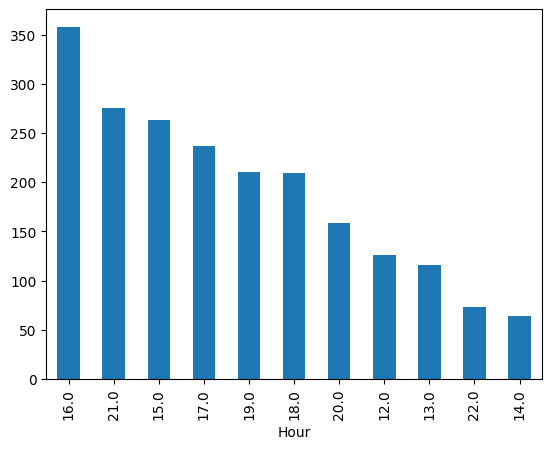

In [88]:
df['Hour'] = pd.to_datetime(df['Time']).dt.hour
df['Hour'].value_counts().plot(kind='bar')


<Axes: >

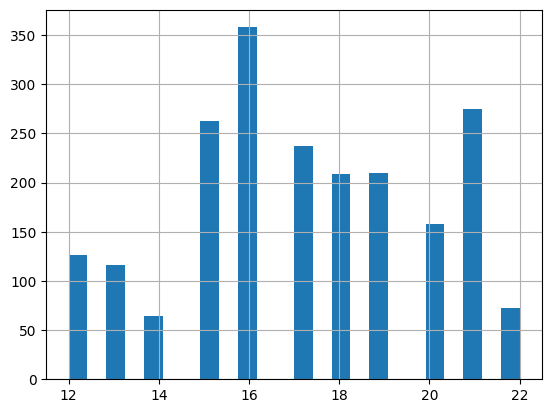

In [89]:
df['Hour'].hist(bins=24)


#### Goal Time

In [90]:
df['Goal_Time'].describe()

count    2203.000000
mean       49.798457
std        27.866675
min         1.000000
25%        25.500000
50%        50.000000
75%        73.000000
max       120.000000
Name: Goal_Time, dtype: float64

<Axes: ylabel='Frequency'>

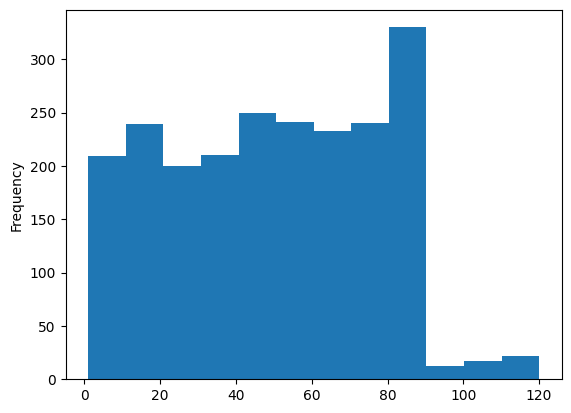

In [91]:
df['Goal_Time'].plot(kind='hist', bins=12)

<Axes: ylabel='Density'>

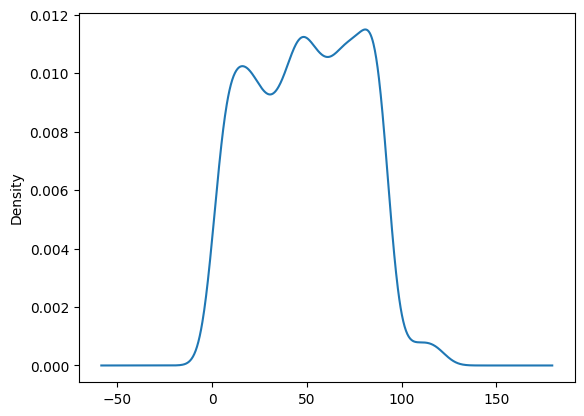

In [92]:
df['Goal_Time'].plot(kind='kde')

<Axes: >

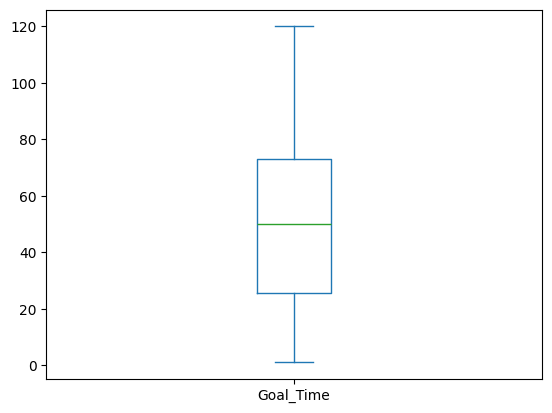

In [93]:
df['Goal_Time'].plot(kind='box')

In [94]:
df['Goal_Time'].skew()

np.float64(0.017725599931299515)

#### Outcome

In [95]:
df['Outcome'].value_counts()

Outcome
Home Win    1326
Away Win     527
Draw         350
Name: count, dtype: int64

<Axes: ylabel='count'>

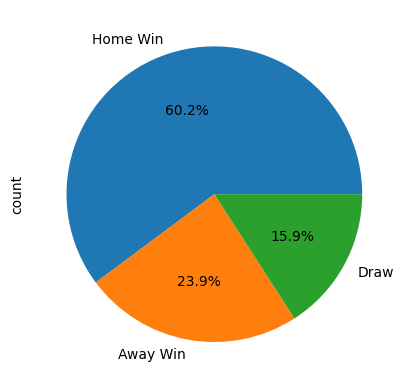

In [96]:
df['Outcome'].value_counts().plot(kind='pie', autopct='%0.1f%%')

#### Top Goal Scorers

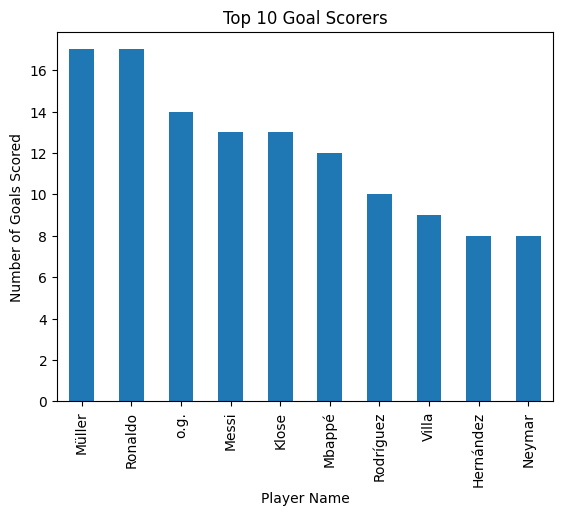

In [97]:
top_scorers = df['Player_Name'].value_counts().head(10)
top_scorers.plot(kind='bar', title='Top 10 Goal Scorers')
plt.xlabel('Player Name')
plt.ylabel('Number of Goals Scored')
plt.show()

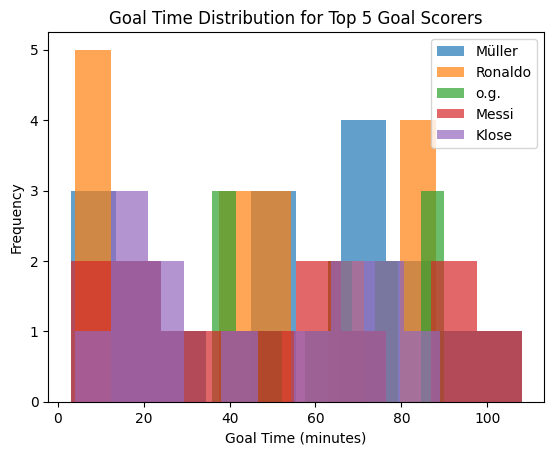

In [98]:
top_5_scorers = df['Player_Name'].value_counts().head(5).index

for player in top_5_scorers:
    player_goal_times = df[df['Player_Name'] == player]['Goal_Time']
    player_goal_times.plot(kind='hist', bins=10, alpha=0.7, label=player)

plt.title('Goal Time Distribution for Top 5 Goal Scorers')
plt.xlabel('Goal Time (minutes)')
plt.ylabel('Frequency')
plt.legend()
plt.show()

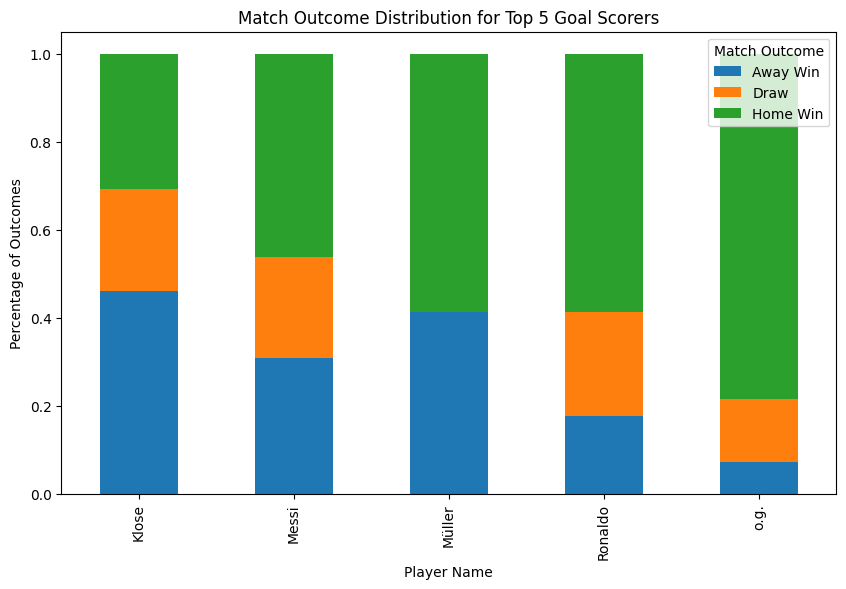

In [99]:
player_outcome = pd.crosstab(df[df['Player_Name'].isin(top_5_scorers)]['Player_Name'], df['Outcome'])

player_outcome_norm = player_outcome.div(player_outcome.sum(axis=1), axis=0)
player_outcome_norm.plot(kind='bar', stacked=True, figsize=(10,6))
plt.title('Match Outcome Distribution for Top 5 Goal Scorers')
plt.xlabel('Player Name')
plt.ylabel('Percentage of Outcomes')
plt.legend(title='Match Outcome')
plt.show()

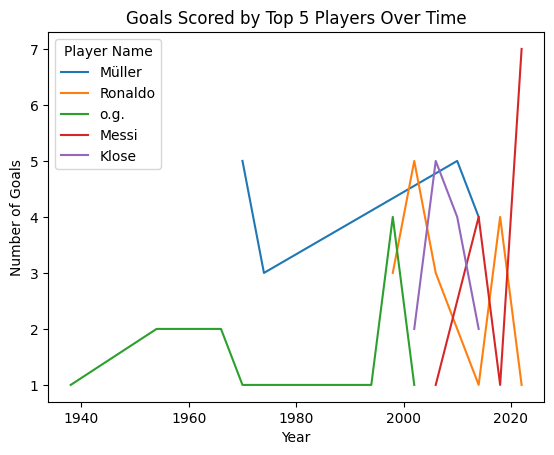

In [100]:
df['Date'] = pd.to_datetime(df['Date'])

df['Year'] = df['Date'].dt.year

for player in top_5_scorers:
    player_goals_per_year = df[df['Player_Name'] == player].groupby('Year')['Player_Name'].count()
    player_goals_per_year.plot(label=player)

plt.title('Goals Scored by Top 5 Players Over Time')
plt.xlabel('Year')
plt.ylabel('Number of Goals')
plt.legend(title='Player Name')
plt.show()


In [101]:
df['Is_Home_Goal'] = df.apply(lambda x: True if x['Player_Name'] and x['Home_Team'] else False, axis=1)
df['Is_Away_Goal'] = df.apply(lambda x: True if x['Player_Name'] and x['Away_Team'] else False, axis=1)

In [102]:
top_5_scorers = df['Player_Name'].value_counts().head(5).index

home_away_goals = pd.DataFrame({
    'Player_Name': top_5_scorers
})

home_away_goals['Home_Goals'] = [df[(df['Player_Name'] == player) & (df['Is_Home_Goal'])].shape[0] for player in top_5_scorers]
home_away_goals['Away_Goals'] = [df[(df['Player_Name'] == player) & (df['Is_Away_Goal'])].shape[0] for player in top_5_scorers]

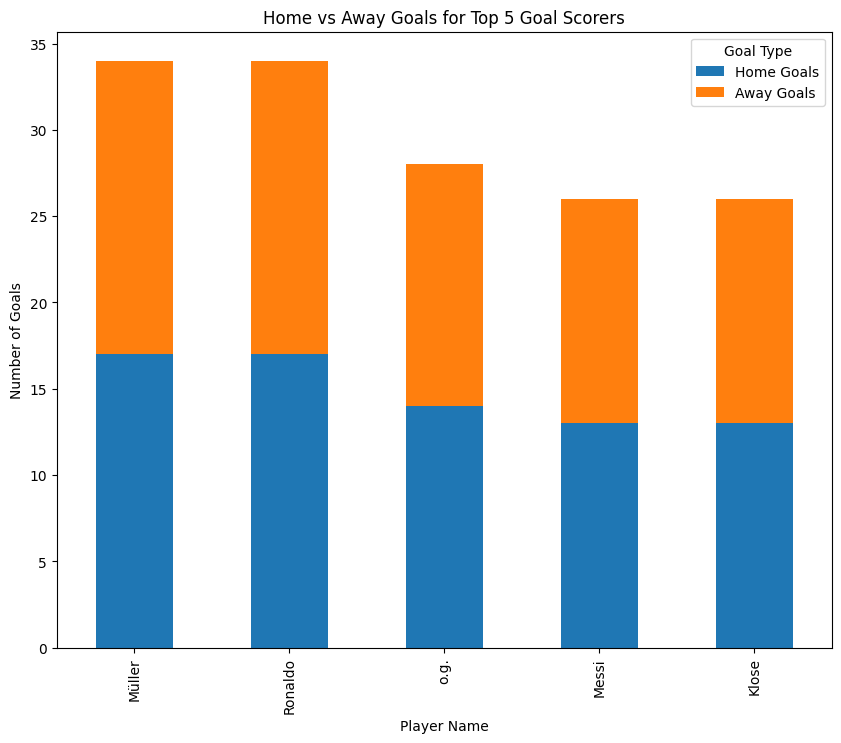

In [103]:
home_away_goals.set_index('Player_Name').plot(kind='bar', stacked=True, figsize=(10,8))
plt.title('Home vs Away Goals for Top 5 Goal Scorers')
plt.xlabel('Player Name')
plt.ylabel('Number of Goals')
plt.legend(title='Goal Type', labels=['Home Goals', 'Away Goals'])
plt.show()


In [104]:
df['Goal_Contribution'] = df.groupby('Player_Name')['Player_Name'].transform('count')
df

,Home_Team,Away_Team,Home_Score,Away_Score,Penalties,Player_Name,Goal_Time,Outcome,Date,Time,...,City,Attendance,Referee,Referee_City,Tournament_Stage,Hour,Year,Is_Home_Goal,Is_Away_Goal,Goal_Contribution
0,france,Mexico,4.0,1.0,NO,L. Laurent,19,Home Win,1930-07-13,15:00:00,...,Montevideo,44440.0,unknown,Uruguay,Group Stage,15.0,1930,True,True,1
1,france,Mexico,4.0,1.0,NO,Langiller,40,Home Win,1930-07-13,15:00:00,...,Montevideo,44440.0,unknown,Uruguay,Group Stage,15.0,1930,True,True,1
2,france,Mexico,4.0,1.0,NO,Maschinot,43,Home Win,1930-07-13,15:00:00,...,Montevideo,44440.0,unknown,Uruguay,Group Stage,15.0,1930,True,True,1
3,france,Mexico,4.0,1.0,NO,Carreño,70,Home Win,1930-07-13,15:00:00,...,Montevideo,44440.0,unknown,Uruguay,Group Stage,15.0,1930,True,True,1
4,argentina,France,1.0,0.0,NO,Monti,81,Home Win,1930-07-15,16:00:00,...,Montevideo,234090.0,Almeida Rêgo,Brazil,Group Stage,16.0,1930,True,True,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2337,argentina,France,3.0,3.0,4–2,Messi,108,Draw,2022-12-18,18:00:00,...,Lusail,889660.0,Szymon Marciniak,Poland,Final,18.0,2022,True,True,13
2338,argentina,France,3.0,3.0,4–2,Di María,36,Draw,2022-12-18,18:00:00,...,Lusail,889660.0,Szymon Marciniak,Poland,Final,18.0,2022,True,True,3
2339,argentina,France,3.0,3.0,4–2,Mbappé,80,Draw,2022-12-18,18:00:00,...,Lusail,889660.0,Szymon Marciniak,Poland,Final,18.0,2022,True,True,12
2340,argentina,France,3.0,3.0,4–2,Mbappé,81,Draw,2022-12-18,18:00:00,...,Lusail,889660.0,Szymon Marciniak,Poland,Final,18.0,2022,True,True,12


In [162]:
df['Goals'] = df.groupby('Player_Name')['Player_Name'].transform('count')


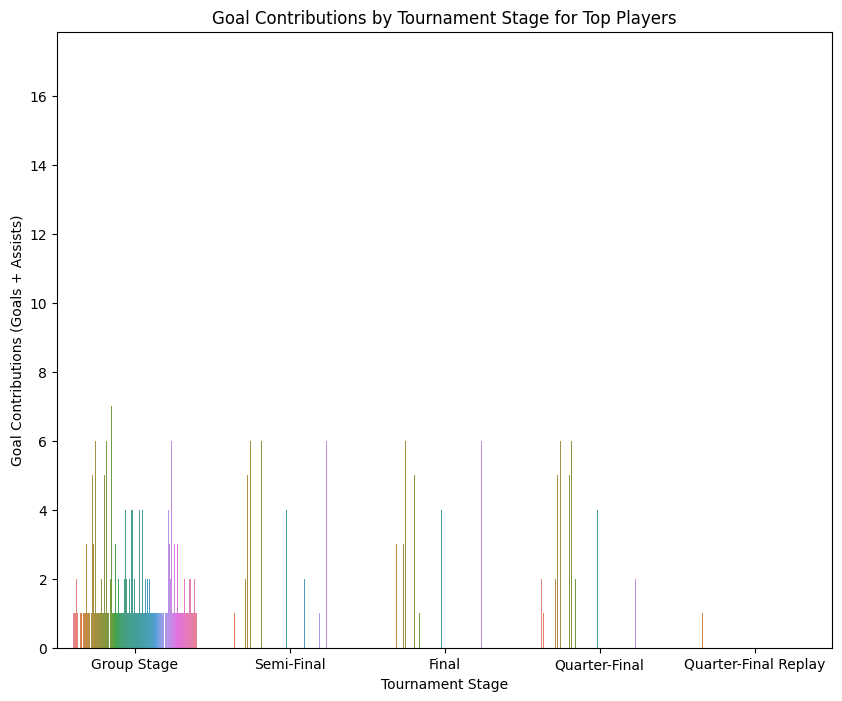

In [163]:
# Plotting Goal Contributions by Tournament Stage
plt.figure(figsize=(10,8))
sns.barplot(x='Tournament_Stage', y='Goal_Contribution', hue='Player_Name', data=df, legend=False)
plt.title('Goal Contributions by Tournament Stage for Top Players')
plt.xlabel('Tournament Stage')
plt.ylabel('Goal Contributions (Goals + Assists)')
plt.show()


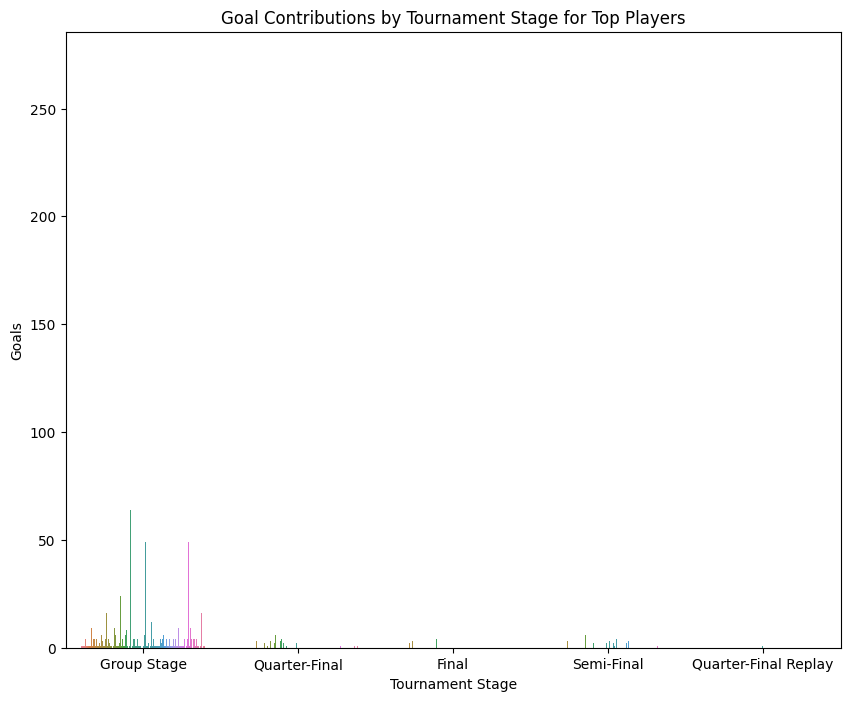

In [164]:
player_stage_performance = df.groupby(['Player_Name', 'Tournament_Stage']).agg({'Goals': 'sum'}).reset_index()

plt.figure(figsize=(10,8))
sns.barplot(x='Tournament_Stage', y='Goals', hue='Player_Name' ,data=player_stage_performance, legend=False)
plt.title('Goal Contributions by Tournament Stage for Top Players')
plt.xlabel('Tournament Stage')
plt.ylabel('Goals')
plt.show()

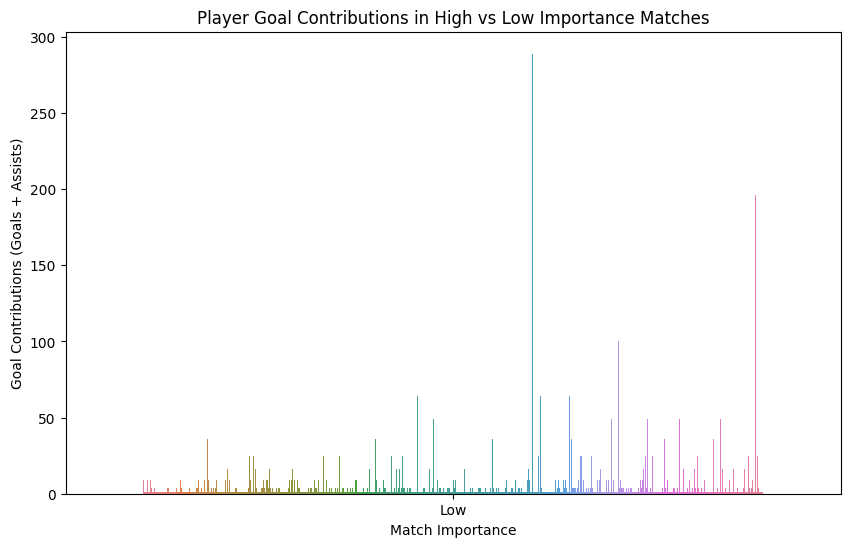

In [165]:
df['Match_Importance'] = df['Tournament_Stage'].apply(lambda x: 'High' if x in ['Finals', 'Semi-finals'] else 'Low')

importance_contribution = df.groupby(['Player_Name', 'Match_Importance']).agg({'Goal_Contribution': 'sum'}).reset_index()

plt.figure(figsize=(10,6))
sns.barplot(x='Match_Importance', y='Goal_Contribution', hue='Player_Name', data=importance_contribution , legend=False)
plt.title('Player Goal Contributions in High vs Low Importance Matches')
plt.xlabel('Match Importance')
plt.ylabel('Goal Contributions (Goals + Assists)')
plt.show()

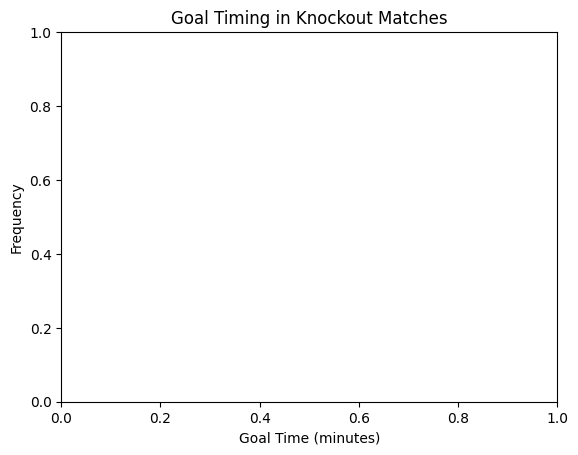

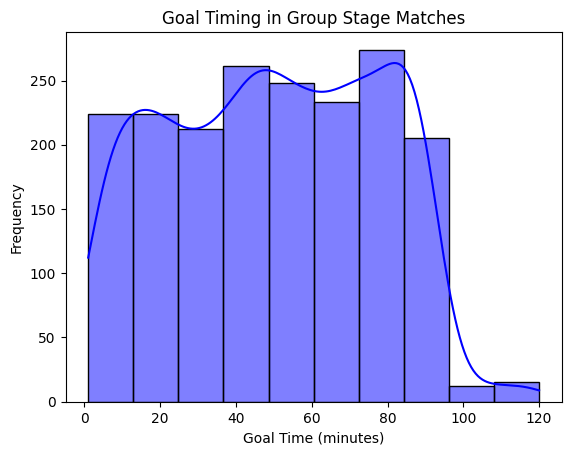

In [166]:
knockout_matches = df[df['Tournament_Stage'].isin(['Finals', 'Semi-finals', 'Quarter-finals'])]

sns.histplot(knockout_matches['Goal_Time'], kde=True, bins=10, color='green')
plt.title('Goal Timing in Knockout Matches')
plt.xlabel('Goal Time (minutes)')
plt.ylabel('Frequency')
plt.show()

group_stage = df[df['Tournament_Stage'] == 'Group Stage']
sns.histplot(group_stage['Goal_Time'], kde=True, bins=10, color='blue')
plt.title('Goal Timing in Group Stage Matches')
plt.xlabel('Goal Time (minutes)')
plt.ylabel('Frequency')
plt.show()

In [167]:
knockout_stages = ['Finals', 'Semi-finals', 'Quarter-finals']

knockout_matches = df[df['Tournament_Stage'].isin(knockout_stages)]

print(knockout_matches.shape)

(0, 26)


In [168]:
print(df['Goal_Time'].isnull().sum())

print(df['Goal_Time'].describe())


0
count    2203.000000
mean       49.798457
std        27.866675
min         1.000000
25%        25.500000
50%        50.000000
75%        73.000000
max       120.000000
Name: Goal_Time, dtype: float64


In [169]:
df = df.dropna(subset=['Goal_Time'])


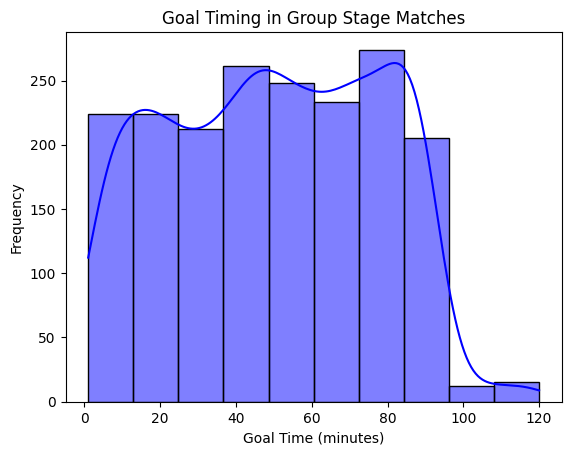

In [170]:
# Plot Goal Timing for Group Stage Matches
group_stage = df[df['Tournament_Stage'] == 'Group Stage']
sns.histplot(group_stage['Goal_Time'], kde=True, bins=10, color='blue')
plt.title('Goal Timing in Group Stage Matches')
plt.xlabel('Goal Time (minutes)')
plt.ylabel('Frequency')
plt.show()


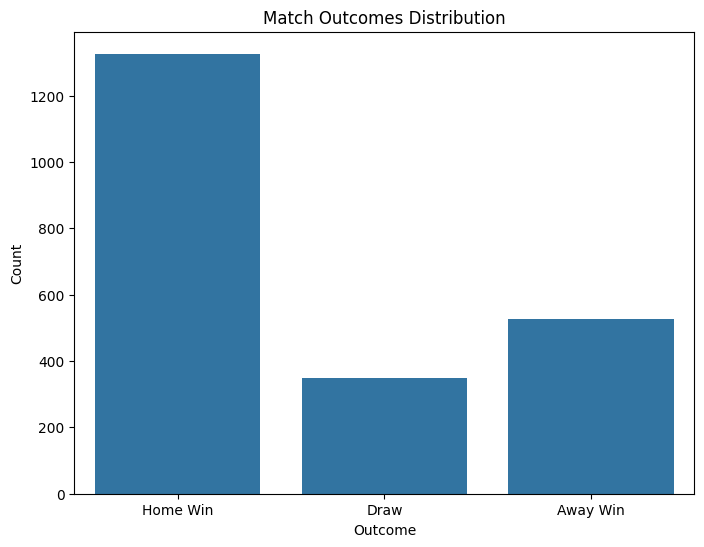

In [171]:
plt.figure(figsize=(8, 6))
sns.countplot(data=df, x='Outcome')
plt.title('Match Outcomes Distribution')
plt.xlabel('Outcome')
plt.ylabel('Count')
plt.show()

In [172]:
df['Tournament_Stage'].tail(15)

2327    Quarter-Final
2328       Semi-Final
2329       Semi-Final
2330       Semi-Final
2331       Semi-Final
2332       Semi-Final
2333      Group Stage
2334      Group Stage
2335      Group Stage
2336            Final
2337            Final
2338            Final
2339            Final
2340            Final
2341            Final
Name: Tournament_Stage, dtype: object

In [173]:
knockout_stages = ['Quarter-Final', 'Semi-Final', 'Final']

knockout_matches = df[df['Tournament_Stage'].isin(knockout_stages)]

print(f"Number of knockout matches: {knockout_matches.shape[0]}")


Number of knockout matches: 292


In [174]:
print(knockout_matches['Goal_Time'].isnull().sum())  
print(knockout_matches['Goal_Time'].describe())  # 


0
count    292.000000
mean      49.428082
std       29.982554
min        1.000000
25%       22.750000
50%       50.000000
75%       73.250000
max      120.000000
Name: Goal_Time, dtype: float64


In [175]:
knockout_matches = knockout_matches.dropna(subset=['Goal_Time'])


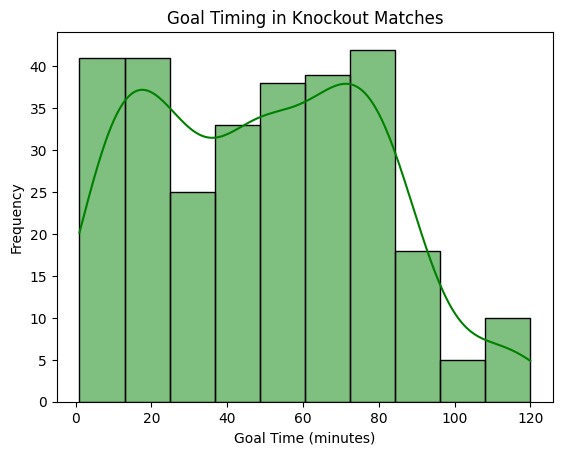

In [176]:
sns.histplot(knockout_matches['Goal_Time'], kde=True, bins=10, color='green')
plt.title('Goal Timing in Knockout Matches')
plt.xlabel('Goal Time (minutes)')
plt.ylabel('Frequency')
plt.show()

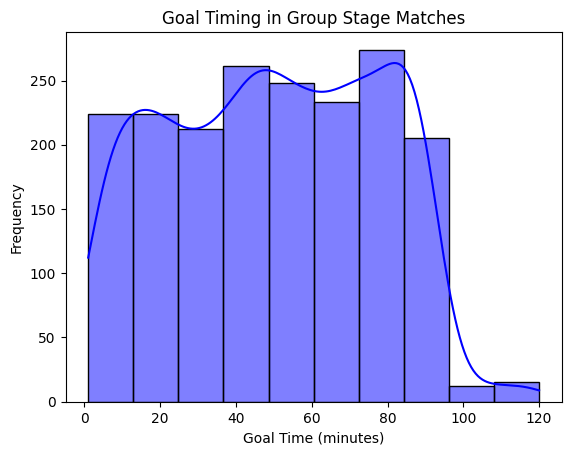

In [177]:
group_stage_matches = df[df['Tournament_Stage'] == 'Group Stage']
sns.histplot(group_stage_matches['Goal_Time'], kde=True, bins=10, color='blue')
plt.title('Goal Timing in Group Stage Matches')
plt.xlabel('Goal Time (minutes)')
plt.ylabel('Frequency')
plt.show()

In [178]:
top_5_scorers = df['Player_Name'].value_counts().head(5).index
group_stage_matches = df[df['Tournament_Stage'] == 'Group Stage']
knockout_stages = ['Quarter-Final', 'Semi-Final', 'Final']
knockout_matches = df[df['Tournament_Stage'].isin(knockout_stages)]


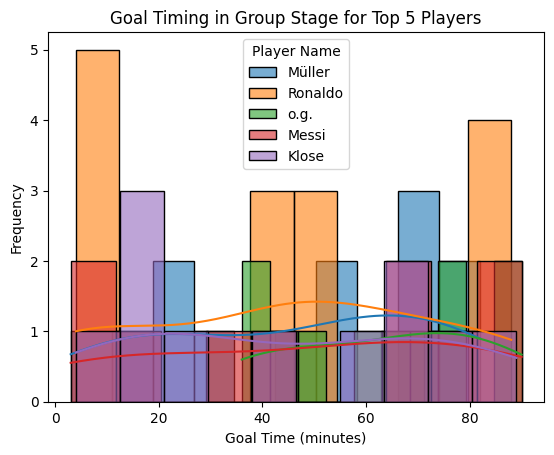

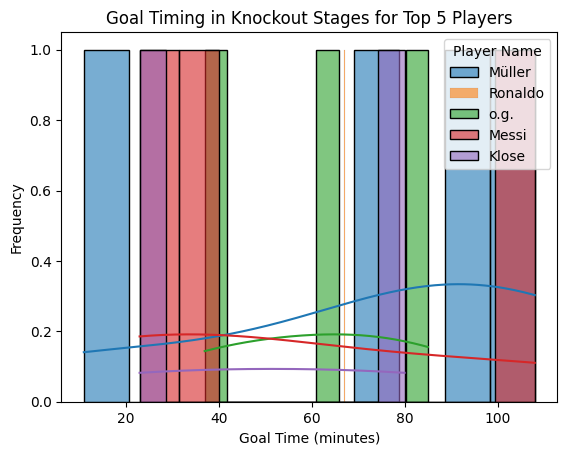

In [179]:
for player in top_5_scorers:
    player_group_goals = group_stage_matches[group_stage_matches['Player_Name'] == player]['Goal_Time']
    sns.histplot(player_group_goals, kde=True, bins=10, label=player, alpha=0.6)

plt.title('Goal Timing in Group Stage for Top 5 Players')
plt.xlabel('Goal Time (minutes)')
plt.ylabel('Frequency')
plt.legend(title='Player Name')
plt.show()

# Step 2b: Plot goal timing for knockout stage matches for each top player
for player in top_5_scorers:
    player_knockout_goals = knockout_matches[knockout_matches['Player_Name'] == player]['Goal_Time']
    sns.histplot(player_knockout_goals, kde=True, bins=10, label=player, alpha=0.6)

plt.title('Goal Timing in Knockout Stages for Top 5 Players')
plt.xlabel('Goal Time (minutes)')
plt.ylabel('Frequency')
plt.legend(title='Player Name')
plt.show()


## Bivariate Analysis

### Numerical - Categorical

#### HomeScore vs Outcomes

In [123]:
pd.crosstab(df['Home_Score'], df['Outcome'], normalize='columns')

Outcome,Away Win,Draw,Home Win
Home_Score,,,
0.0,0.404175,0.000000,0.000000
1.0,0.423150,0.497143,0.077677
2.0,0.163188,0.360000,0.315234
3.0,0.009488,0.108571,0.298643
4.0,0.000000,0.034286,0.179487
5.0,0.000000,0.000000,0.056561
6.0,0.000000,0.000000,0.072398


array([<Axes: ylabel='Away Win'>, <Axes: ylabel='Draw'>,
       <Axes: ylabel='Home Win'>], dtype=object)

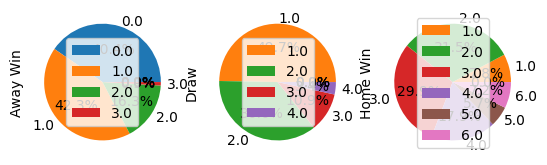

In [124]:
pd.crosstab(df['Home_Score'],df['Outcome']).plot(kind='pie', autopct='%0.1f%%', subplots=True)

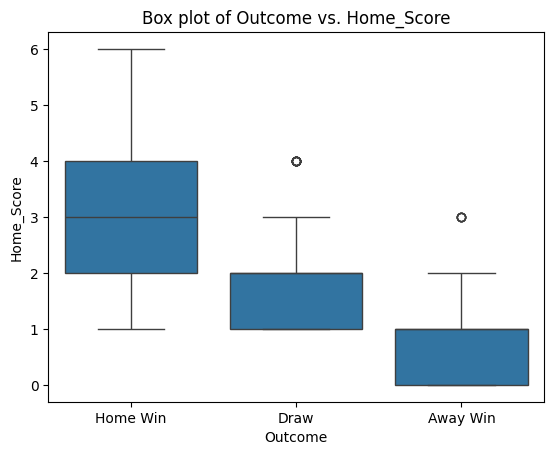

In [125]:
sns.boxplot(x= df['Outcome'], y=df['Home_Score'], data=df)
plt.title(f"Box plot of {'Outcome'} vs. {'Home_Score'}")
plt.show()

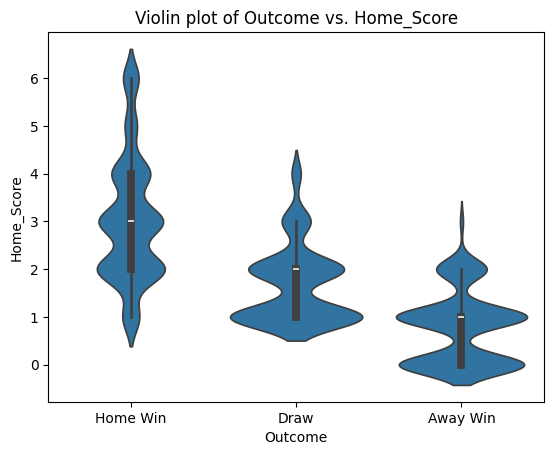

In [126]:
sns.violinplot(x=df['Outcome'], y=df['Home_Score'] , data=df)
plt.title(f"Violin plot of {'Outcome'} vs. {'Home_Score'}")
plt.show()

#### AwayScore vs Outcomes

In [127]:
pd.crosstab(df['Away_Score'], df['Outcome'], normalize='columns')

Outcome,Away Win,Draw,Home Win
Away_Score,,,
0.0,0.000000,0.000000,0.320513
1.0,0.127135,0.497143,0.468326
2.0,0.366224,0.360000,0.188537
3.0,0.322581,0.108571,0.019608
4.0,0.113852,0.034286,0.000000
5.0,0.047438,0.000000,0.003017
7.0,0.022770,0.000000,0.000000


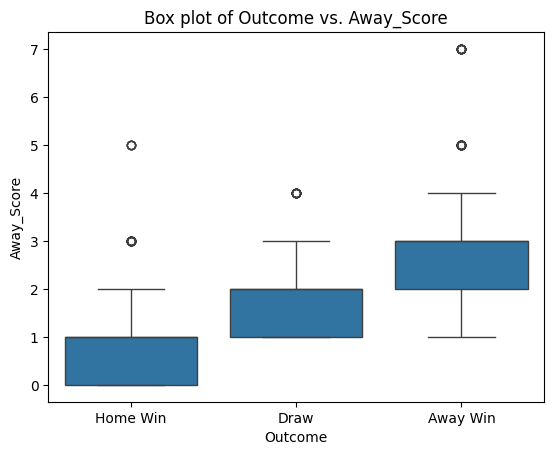

In [128]:
sns.boxplot(x= df['Outcome'], y=df['Away_Score'], data=df)
plt.title(f"Box plot of {'Outcome'} vs. {'Away_Score'}")
plt.show()

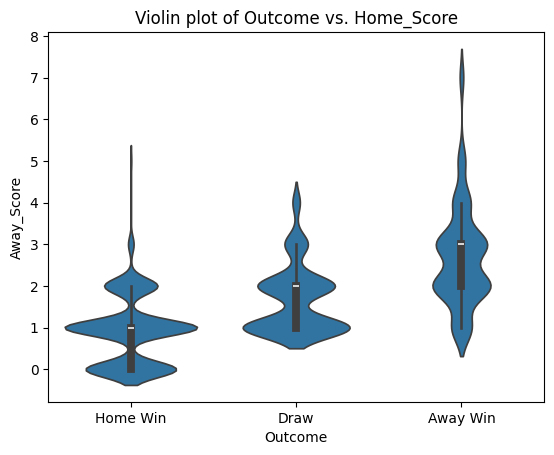

In [129]:
sns.violinplot(x=df['Outcome'], y=df['Away_Score'] , data=df)
plt.title(f"Violin plot of {'Outcome'} vs. {'Home_Score'}")
plt.show()

In [130]:
data = df.groupby('Home_Team')

In [131]:
team_home_performance = pd.crosstab(df['Home_Team'], df['Home_Score']).sort_index(ascending=True)

In [132]:
team_away_performance = pd.crosstab(df['Away_Team'], df['Away_Score']).sort_index(ascending=True)


#### Home_Team & Away_Team vs Goal_Time

In [133]:
pd.crosstab(df['Home_Team'], df['Goal_Time'], normalize='columns')

Goal_Time,1,2,3,4,5,6,7,8,9,10,...,109,110,111,113,115,116,117,118,119,120
Home_Team,,,,,,,,,,,,,,,,,,,,,
algeria,0.0,0.000000,0.000000,0.00000,0.000000,0.083333,0.043478,0.000000,0.000000,0.000000,...,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.000000,0.0,0.0
angola,0.0,0.000000,0.000000,0.03125,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.000000,0.0,0.0
argentina,0.0,0.066667,0.230769,0.09375,0.041667,0.166667,0.000000,0.125000,0.111111,0.090909,...,0.0,0.0,0.0,0.0,0.25,0.0,0.0,0.666667,0.0,0.0
australia,0.0,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.000000,0.0,0.0
austria,0.0,0.000000,0.076923,0.03125,0.000000,0.041667,0.000000,0.041667,0.000000,0.045455,...,0.5,0.0,0.0,0.0,0.00,0.5,0.0,0.000000,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
uruguay,0.0,0.000000,0.000000,0.06250,0.083333,0.000000,0.130435,0.041667,0.000000,0.045455,...,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.000000,0.0,0.0
wales,0.0,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.000000,0.0,0.0
west germany,0.0,0.066667,0.000000,0.00000,0.000000,0.041667,0.000000,0.041667,0.111111,0.090909,...,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.000000,0.0,0.0


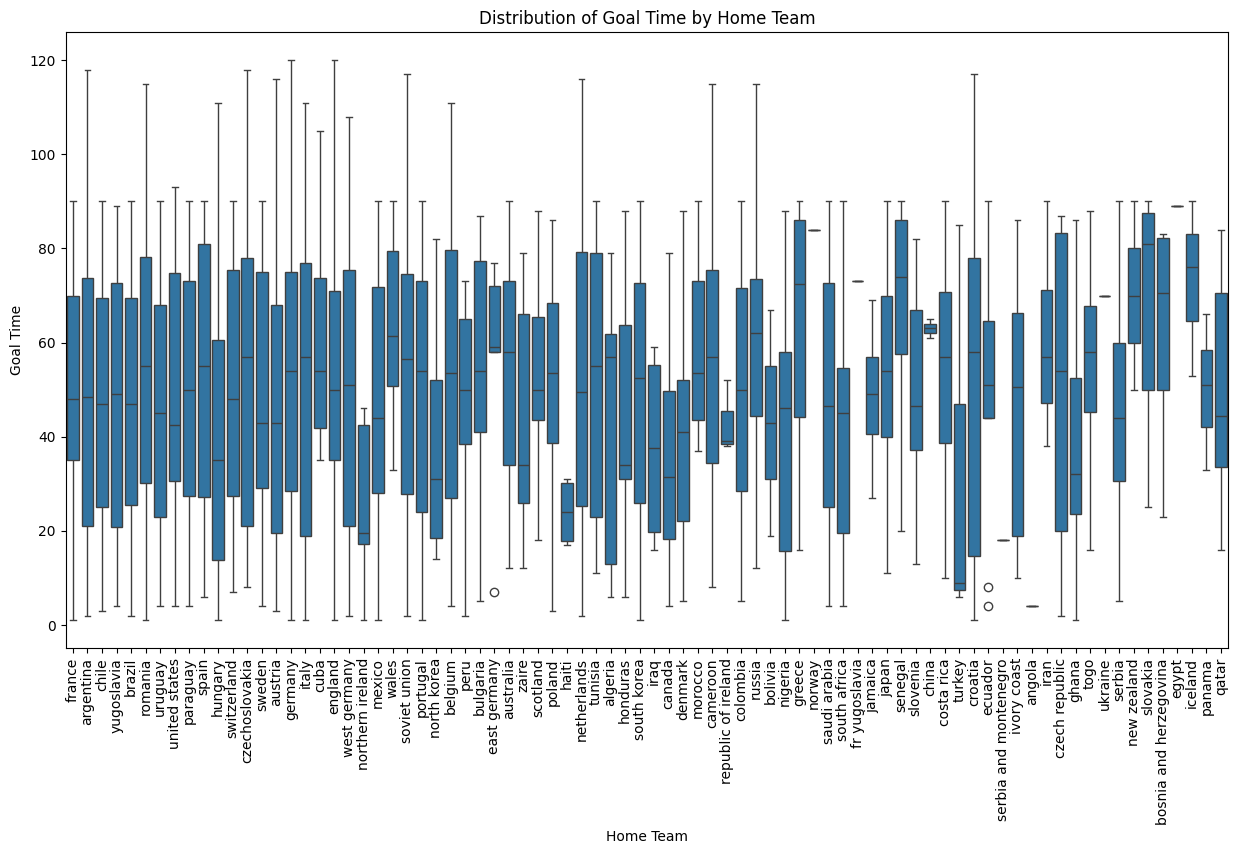

In [134]:
plt.figure(figsize=(15, 8))
sns.boxplot(data=df, x='Home_Team', y='Goal_Time')
plt.xticks(rotation=90)
plt.title('Distribution of Goal Time by Home Team')
plt.xlabel('Home Team')
plt.ylabel('Goal Time')
plt.show()


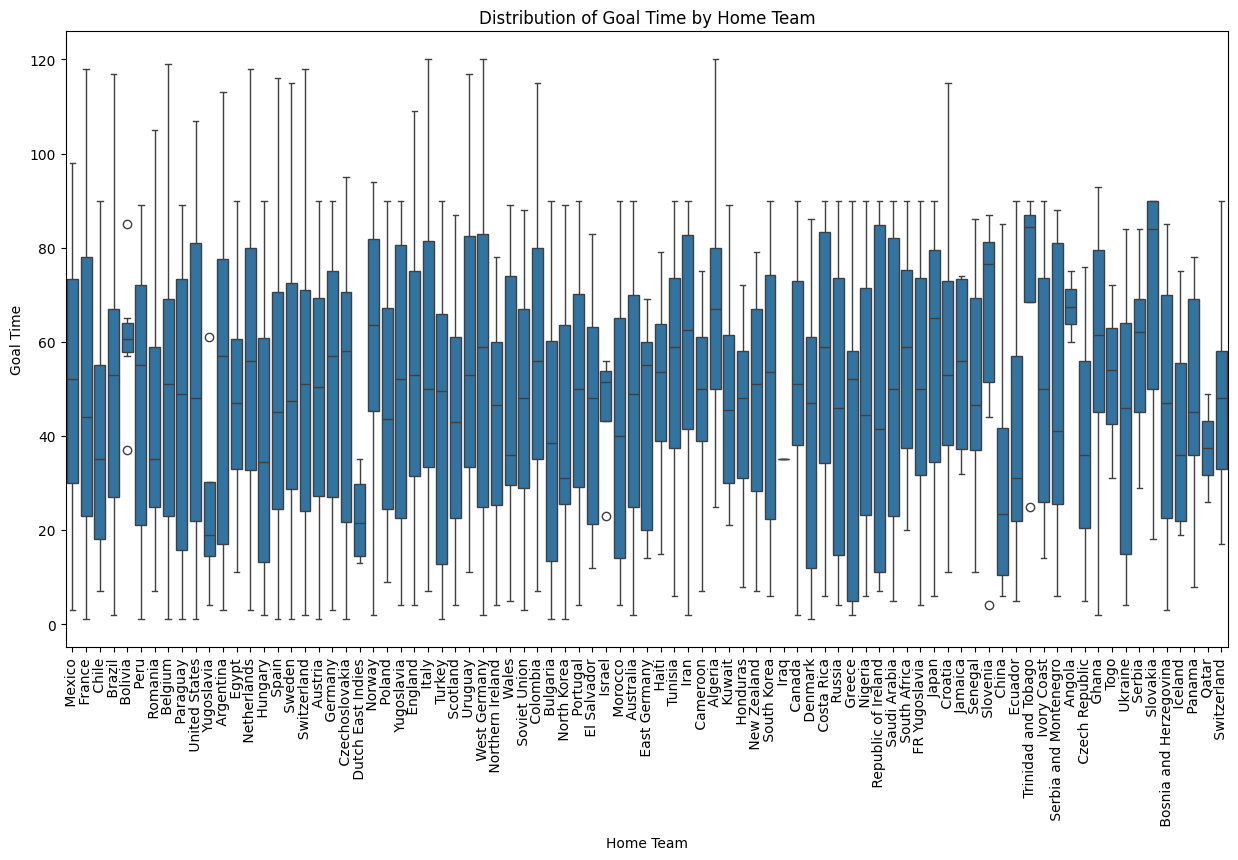

In [135]:
plt.figure(figsize=(15, 8))
sns.boxplot(data=df, x='Away_Team', y='Goal_Time')
plt.xticks(rotation=90)
plt.title('Distribution of Goal Time by Home Team')
plt.xlabel('Home Team')
plt.ylabel('Goal Time')
plt.show()


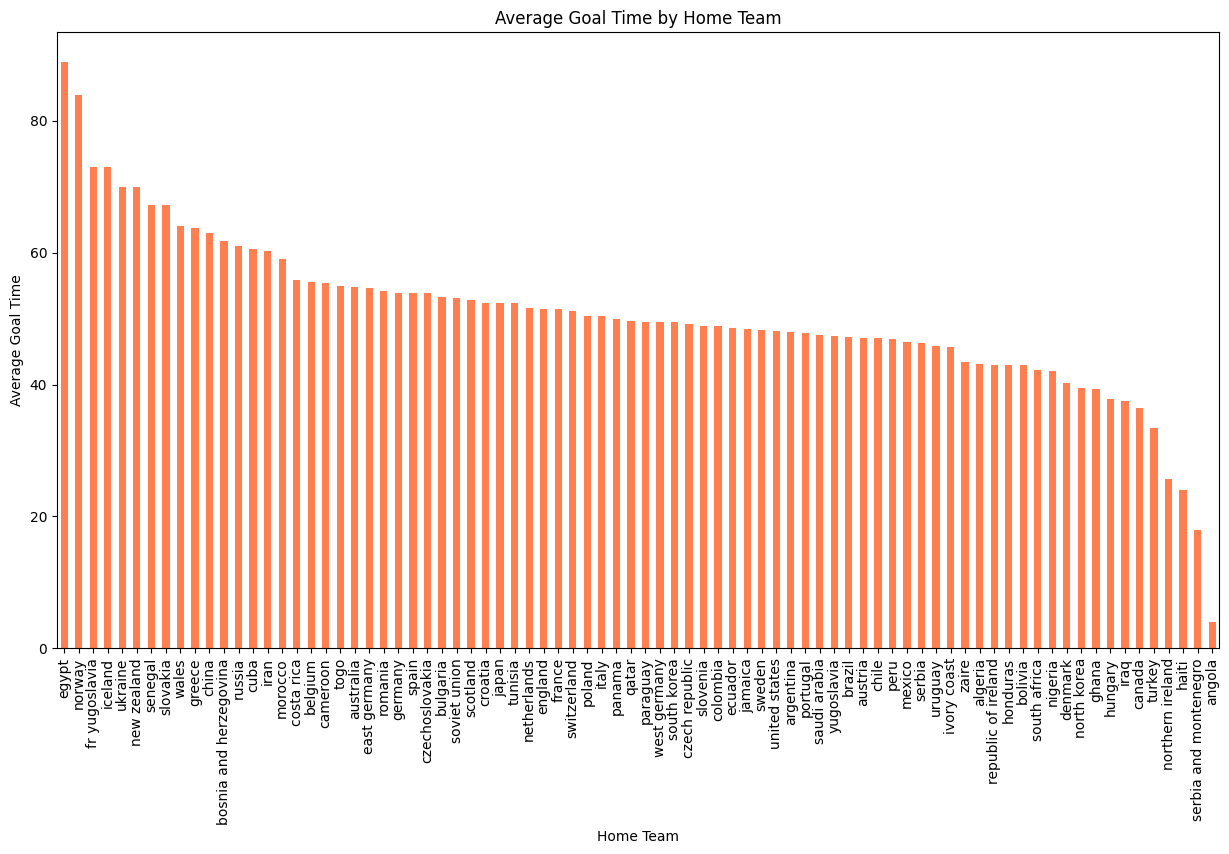

In [136]:
plt.figure(figsize=(15, 8))
average_goal_time_home = df.groupby('Home_Team')['Goal_Time'].mean().sort_values(ascending=False)
average_goal_time_home.plot(kind='bar', color='coral')
plt.title('Average Goal Time by Home Team')
plt.xlabel('Home Team')
plt.ylabel('Average Goal Time')
plt.xticks(rotation=90)
plt.show()

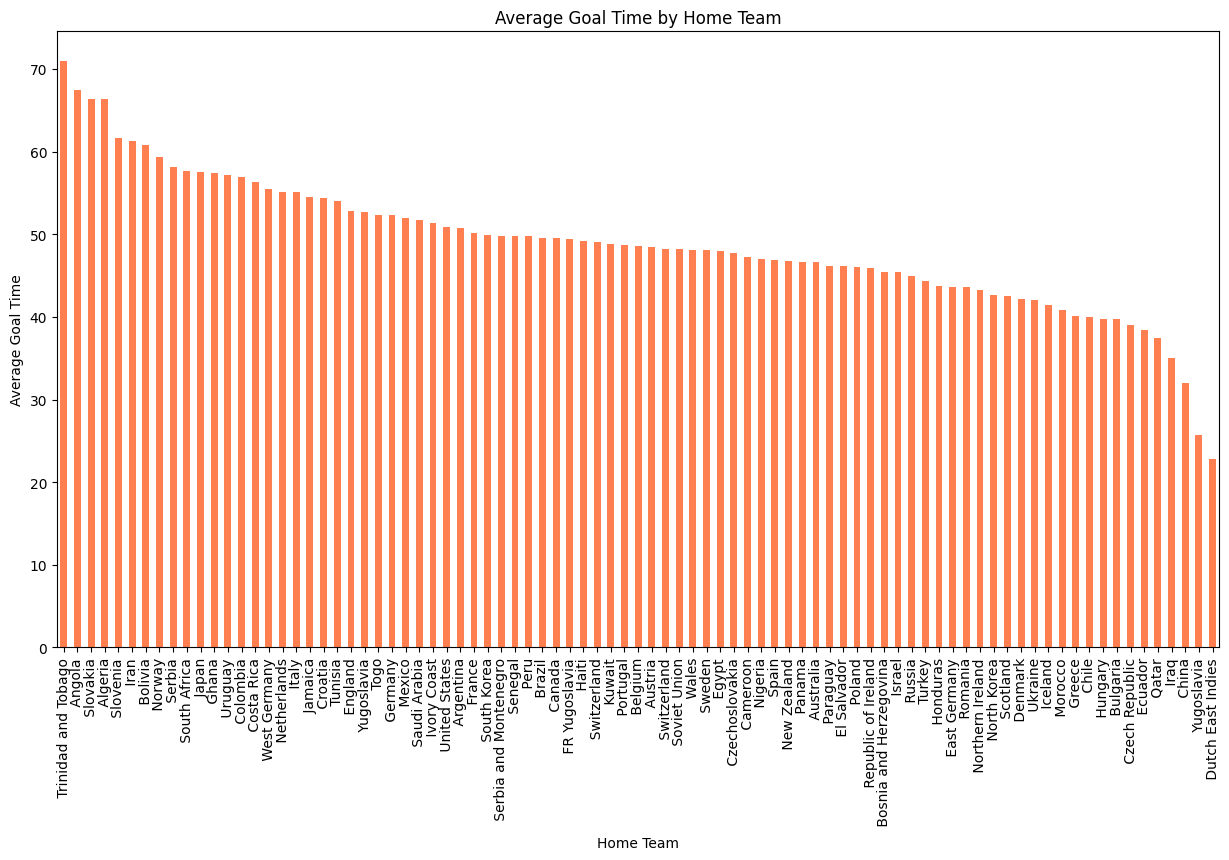

In [137]:
plt.figure(figsize=(15, 8))
average_goal_time_home = df.groupby('Away_Team')['Goal_Time'].mean().sort_values(ascending=False)
average_goal_time_home.plot(kind='bar', color='coral')
plt.title('Average Goal Time by Home Team')
plt.xlabel('Home Team')
plt.ylabel('Average Goal Time')
plt.xticks(rotation=90)
plt.show()

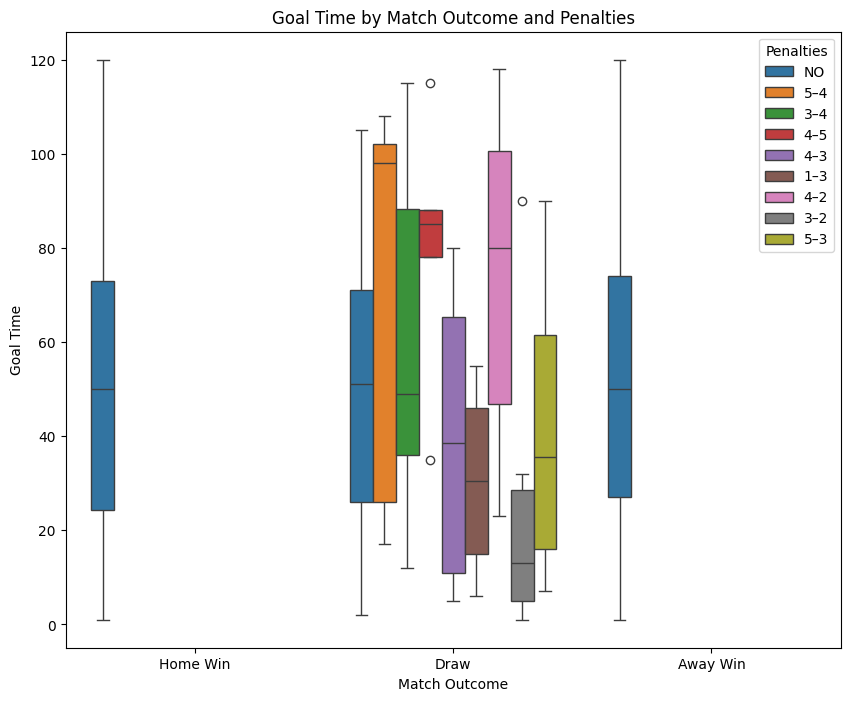

In [138]:
plt.figure(figsize=(10, 8))
sns.boxplot(data=df, y='Goal_Time', x='Outcome', hue='Penalties')
plt.title('Goal Time by Match Outcome and Penalties')
plt.xlabel('Match Outcome')
plt.ylabel('Goal Time')
plt.show()

In [139]:
df['Team_Type'] = ['Home' if row['Player_Name'] in df['Home_Team'].values else 'Away' for idx, row in df.iterrows()]

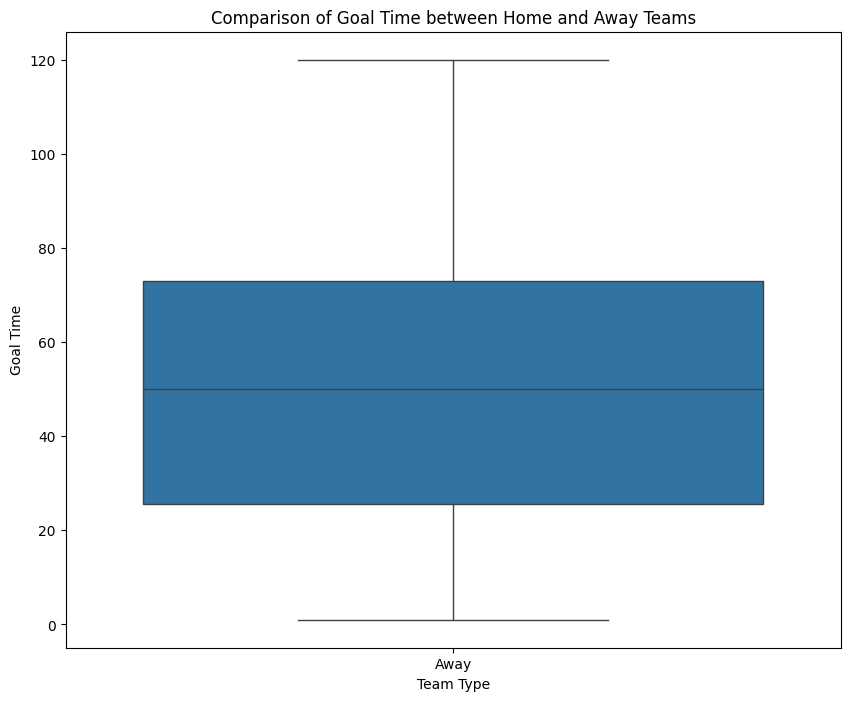

In [140]:
plt.figure(figsize=(10, 8))
sns.boxplot(data=df, x='Team_Type', y='Goal_Time')
plt.title('Comparison of Goal Time between Home and Away Teams')
plt.xlabel('Team Type')
plt.ylabel('Goal Time')
plt.show()

In [141]:
home_wins = df[df['Outcome'] == 'Home Win'].groupby(['Home_Team', 'City']).size().reset_index(name='Win_Count')
home_losses = df[df['Outcome'] == 'Away Win'].groupby(['Home_Team', 'City']).size().reset_index(name='Lose_Count')

In [142]:
home_team_city_win_loss = pd.merge(home_wins, home_losses, how='outer', on=['Home_Team', 'City']).fillna(0)

home_team_city_win_loss = home_team_city_win_loss.sort_values(by='Win_Count', ascending=False)

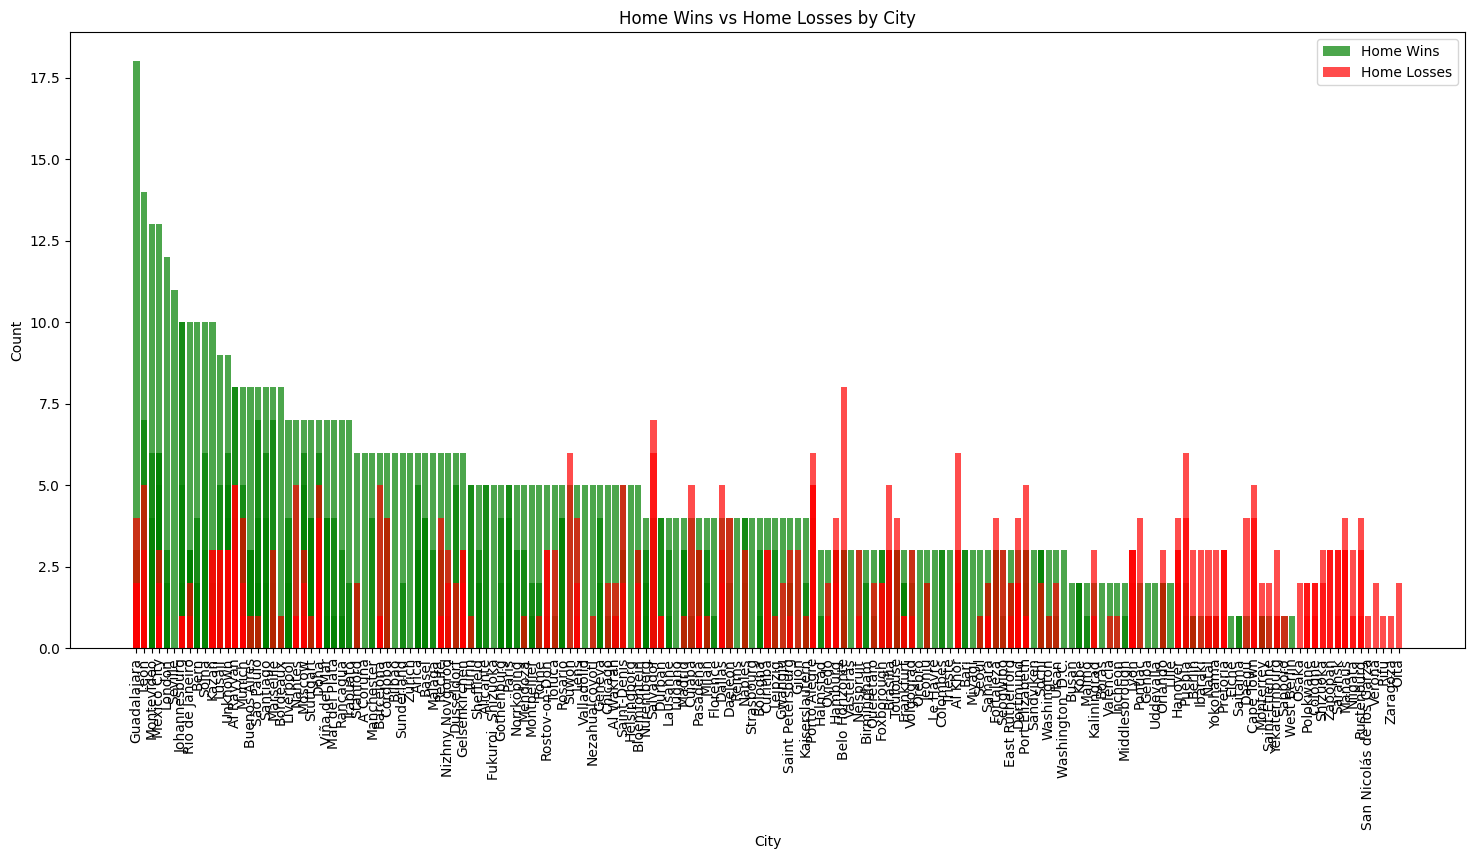

In [143]:
plt.figure(figsize=(18, 8))
plt.bar(home_team_city_win_loss['City'], home_team_city_win_loss['Win_Count'], label='Home Wins', color='green', alpha=0.7)
plt.bar(home_team_city_win_loss['City'], home_team_city_win_loss['Lose_Count'], label='Home Losses', color='red', alpha=0.7)
plt.xticks(rotation=90)
plt.title('Home Wins vs Home Losses by City')
plt.xlabel('City')
plt.ylabel('Count')
plt.legend()
plt.show()

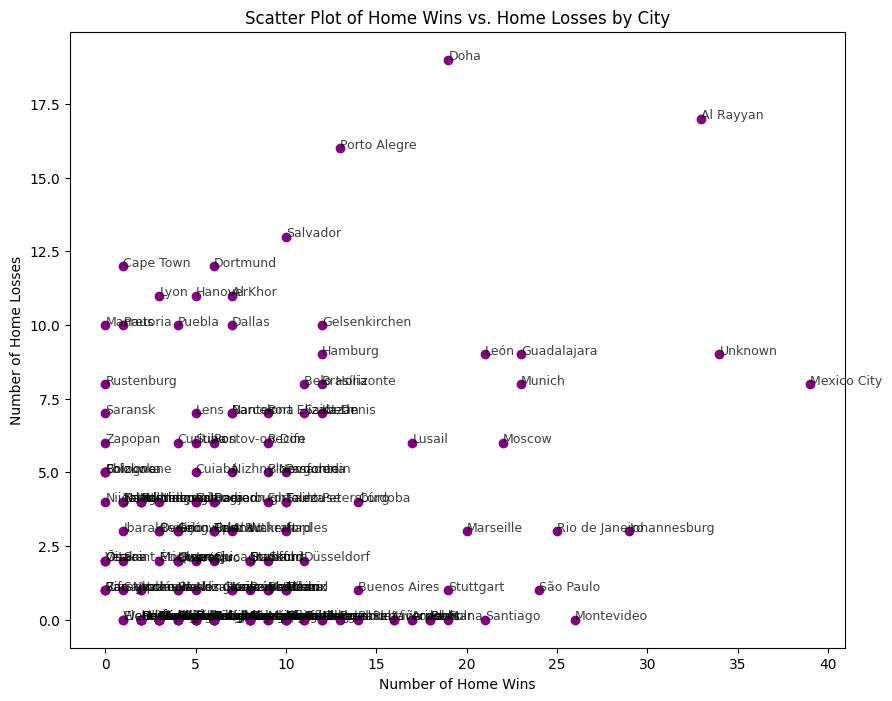

In [144]:
home_wins_city = df[df['Outcome'] == 'Home Win'].groupby('City').size().reset_index(name='Home_Wins')
home_losses_city = df[df['Outcome'] == 'Away Win'].groupby('City').size().reset_index(name='Home_Losses')

home_win_loss_city = pd.merge(home_wins_city, 
home_losses_city, how='outer', on='City').fillna(0)

plt.figure(figsize=(10, 8))
plt.scatter(home_win_loss_city['Home_Wins'], home_win_loss_city['Home_Losses'], color='purple')
plt.title('Scatter Plot of Home Wins vs. Home Losses by City')
plt.xlabel('Number of Home Wins')
plt.ylabel('Number of Home Losses')

for i, row in home_win_loss_city.iterrows():
    plt.text(row['Home_Wins'], row['Home_Losses'], row['City'], fontsize=9, alpha=0.75)

plt.show()


#### Home and AWay team vs Referee 

In [145]:
referee_home_away = df.groupby(['Referee', 'Home_Team', 'Away_Team']).size().reset_index(name='Match_Count')
referee_home_away = referee_home_away.sort_values(by='Match_Count', ascending=False).head(20)  


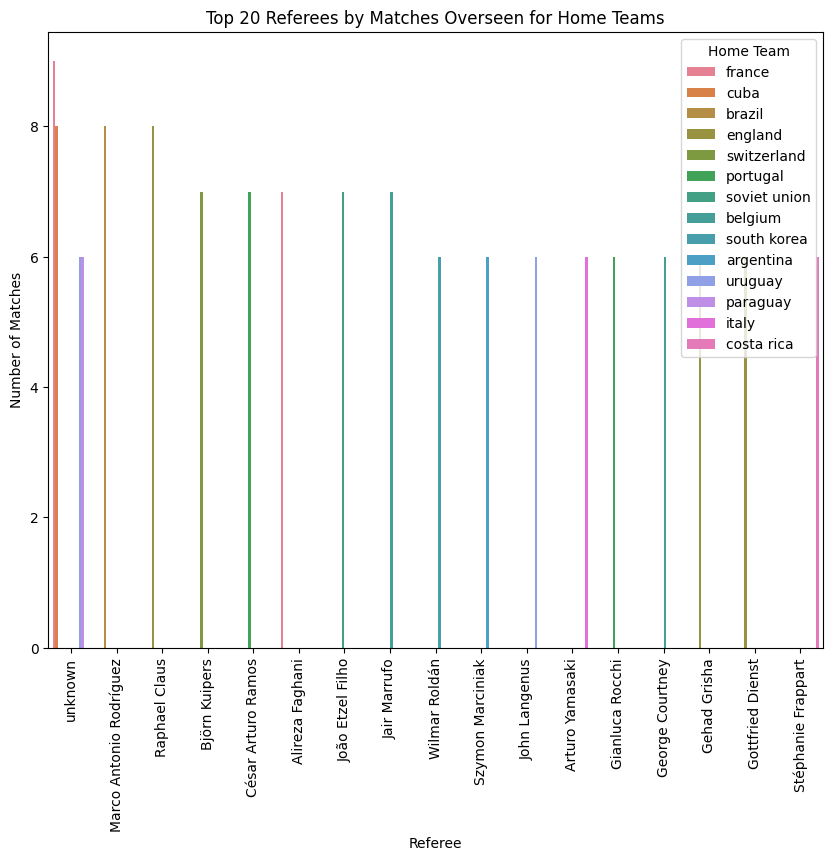

In [146]:
plt.figure(figsize=(10, 8))
sns.barplot(data=referee_home_away, x='Referee', y='Match_Count', hue='Home_Team')
plt.xticks(rotation=90)
plt.title('Top 20 Referees by Matches Overseen for Home Teams')
plt.ylabel('Number of Matches')
plt.xlabel('Referee')
plt.legend(title='Home Team')
plt.show()

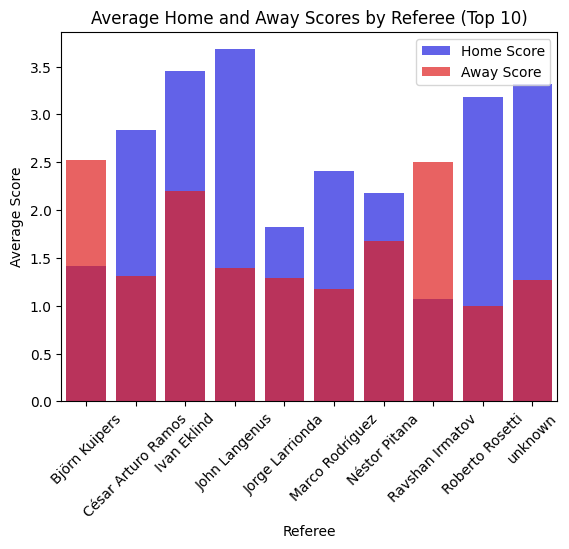

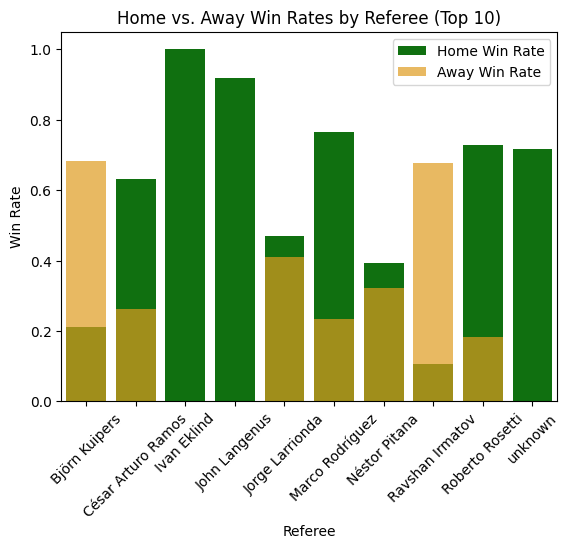

In [147]:
############### Taking from Chat-gpt #############
top_referees = df['Referee'].value_counts().head(10).index
referee_scores = df[df['Referee'].isin(top_referees)].groupby('Referee').agg(
    avg_home_score=('Home_Score', 'mean'),
    avg_away_score=('Away_Score', 'mean')
).reset_index()

# Plotting average scores by referee
sns.barplot(data=referee_scores, x='Referee', y='avg_home_score', color='blue', label='Home Score', alpha=0.7)
sns.barplot(data=referee_scores, x='Referee', y='avg_away_score', color='red', label='Away Score', alpha=0.7)
plt.title('Average Home and Away Scores by Referee (Top 10)')
plt.ylabel('Average Score')
plt.xlabel('Referee')
plt.xticks(rotation=45)
plt.legend()
plt.show()

# 2. Home vs. Away Wins per Referee (limited to top 10 referees)
referee_outcomes = df[df['Referee'].isin(top_referees)].groupby(['Referee', 'Outcome']).size().unstack(fill_value=0)
referee_outcomes['Total_Matches'] = referee_outcomes.sum(axis=1)
referee_outcomes['Home_Win_Rate'] = referee_outcomes['Home Win'] / referee_outcomes['Total_Matches']
referee_outcomes['Away_Win_Rate'] = referee_outcomes['Away Win'] / referee_outcomes['Total_Matches']

# Plotting win rates by referee
sns.barplot(data=referee_outcomes.reset_index(), x='Referee', y='Home_Win_Rate', color='green', label='Home Win Rate')
sns.barplot(data=referee_outcomes.reset_index(), x='Referee', y='Away_Win_Rate', color='orange', label='Away Win Rate', alpha=0.7)
plt.title('Home vs. Away Win Rates by Referee (Top 10)')
plt.ylabel('Win Rate')
plt.xlabel('Referee')
plt.xticks(rotation=45)
plt.legend()
plt.show()


In [148]:
referee_outcomes = df.groupby(['Referee', 'Outcome']).size().unstack(fill_value=0)
referee_outcomes['Total_Matches'] = referee_outcomes.sum(axis=1)



In [149]:
referee_outcomes['Home_Win_Rate'] = referee_outcomes['Home Win'] / referee_outcomes['Total_Matches']
referee_outcomes['Away_Win_Rate'] = referee_outcomes['Away Win'] / referee_outcomes['Total_Matches']
referee_outcomes['Win_Rate_Difference'] = referee_outcomes['Home_Win_Rate'] - referee_outcomes['Away_Win_Rate']
referee_outcomes_filtered = referee_outcomes[referee_outcomes['Total_Matches'] >= 10]

In [150]:
referee_outcomes_sorted = referee_outcomes_filtered.sort_values(by='Win_Rate_Difference', ascending=False)
referee_outcomes_sorted

Outcome,Away Win,Draw,Home Win,Total_Matches,Home_Win_Rate,Away_Win_Rate,Win_Rate_Difference
Referee,,,,,,,
Arturo Yamasaki,0,0,11,11,1.000000,0.000000,1.000000
Carlos Velasco Carballo,0,0,10,10,1.000000,0.000000,1.000000
Frank De Bleeckere,0,0,13,13,1.000000,0.000000,1.000000
Ivan Eklind,0,0,20,20,1.000000,0.000000,1.000000
Juan Gardeazábal Garay,0,0,11,11,1.000000,0.000000,1.000000
...,...,...,...,...,...,...,...
Benito Archundia,9,4,1,14,0.071429,0.642857,-0.571429
Ravshan Irmatov,19,6,3,28,0.107143,0.678571,-0.571429
Urs Meier,8,2,1,11,0.090909,0.727273,-0.636364


C:\Users\User\AppData\Local\Temp\ipykernel_8212\545375228.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=referee_outcomes_sorted.index, y=referee_outcomes_sorted['Win_Rate_Difference'], palette='coolwarm')


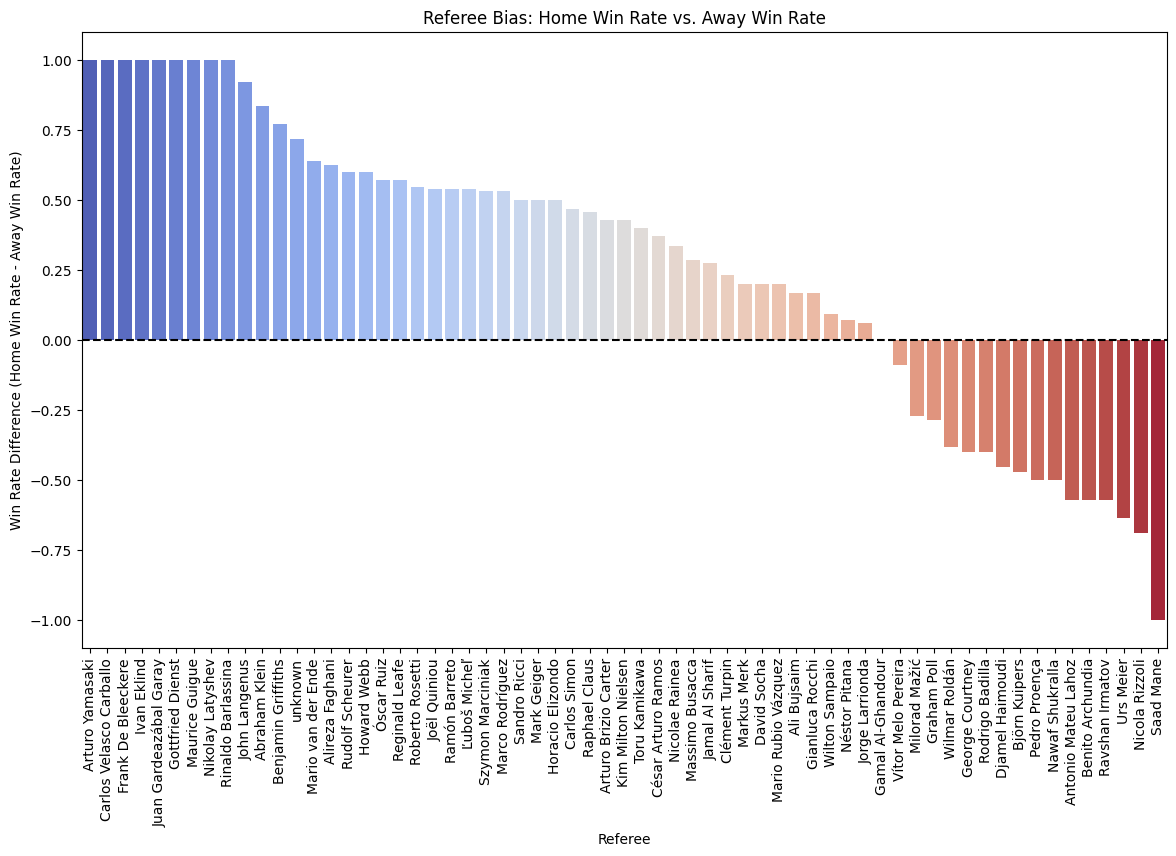

In [151]:
plt.figure(figsize=(14, 8))
sns.barplot(x=referee_outcomes_sorted.index, y=referee_outcomes_sorted['Win_Rate_Difference'], palette='coolwarm')
plt.title('Referee Bias: Home Win Rate vs. Away Win Rate')
plt.xlabel('Referee')
plt.ylabel('Win Rate Difference (Home Win Rate - Away Win Rate)')
plt.xticks(rotation=90)
plt.axhline(0, color='black', linestyle='--')
plt.show()


#### Home Score vs. Away Score

In [152]:
home_away_stats = df[['Home_Score', 'Away_Score']].describe()
home_away_stats

,Home_Score,Away_Score
count,2203.000000,2203.000000
mean,2.282342,1.461189
std,1.480479,1.168274
min,0.000000,0.000000
25%,1.000000,1.000000
50%,2.000000,1.000000
75%,3.000000,2.000000
max,6.000000,7.000000


In [153]:
pd.crosstab(df['Home_Score'], df['Away_Score'])

Away_Score,0.0,1.0,2.0,3.0,4.0,5.0,7.0
Home_Score,,,,,,,
0.0,0,67,71,59,12,0,4
1.0,103,174,122,56,25,12,8
2.0,129,289,126,55,18,13,0
3.0,89,173,134,38,5,0,0
4.0,58,96,71,13,12,0,0
5.0,23,11,37,4,0,0,0
6.0,23,52,8,9,0,4,0


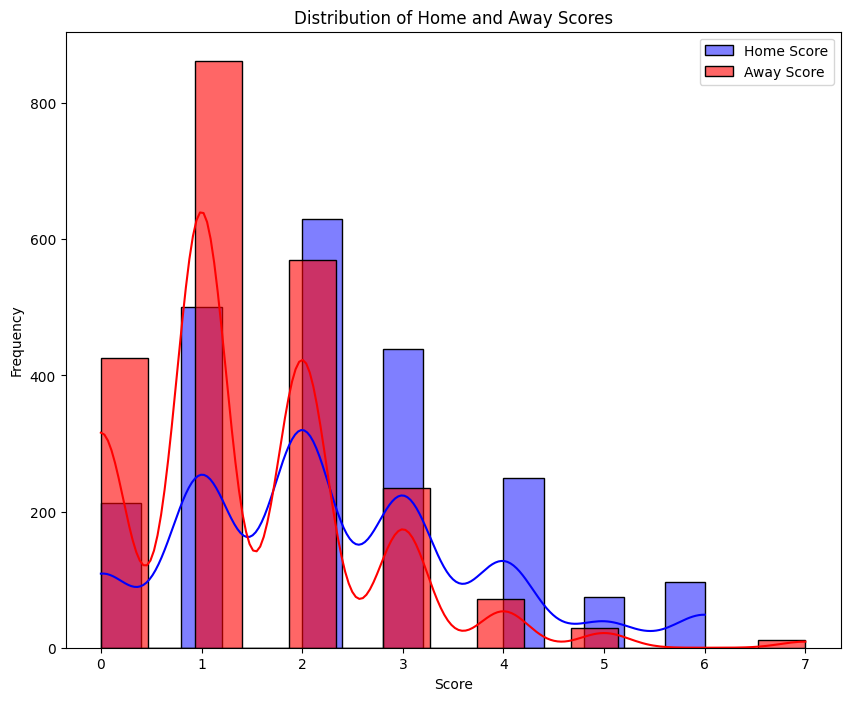

In [154]:
plt.figure(figsize=(10, 8))
sns.histplot(df['Home_Score'], color='blue', label='Home Score', kde=True, bins=15)
sns.histplot(df['Away_Score'], color='red', label='Away Score', kde=True, bins=15, alpha=0.6)
plt.title('Distribution of Home and Away Scores')
plt.xlabel('Score')
plt.ylabel('Frequency')
plt.legend()
plt.show()

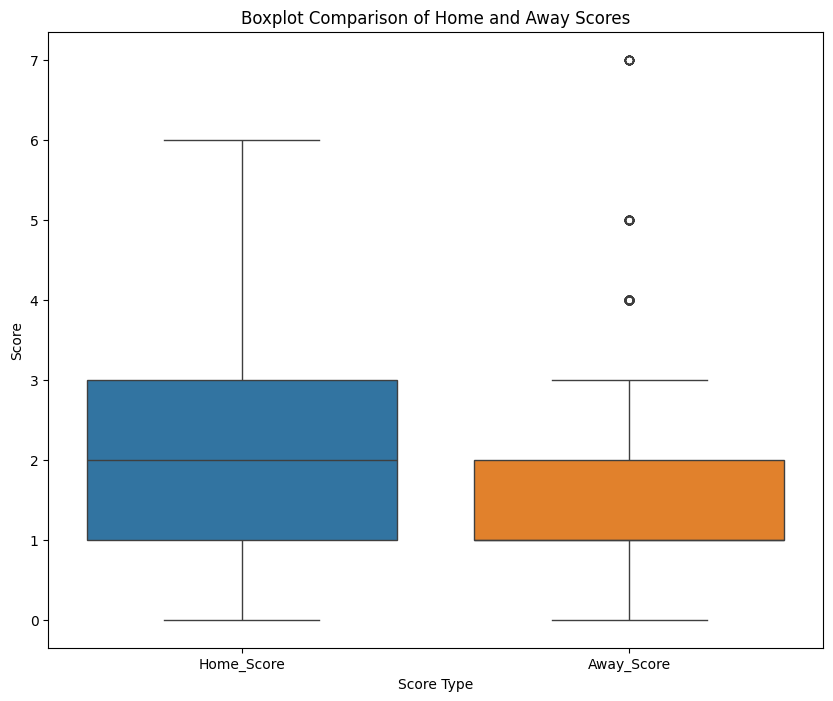

In [155]:
correlation = df['Home_Score'].corr(other=df['Away_Score'])
plt.figure(figsize=(10, 8))
sns.boxplot(data=df[['Home_Score', 'Away_Score']])
plt.title('Boxplot Comparison of Home and Away Scores')
plt.xlabel('Score Type')
plt.ylabel('Score')
plt.show()


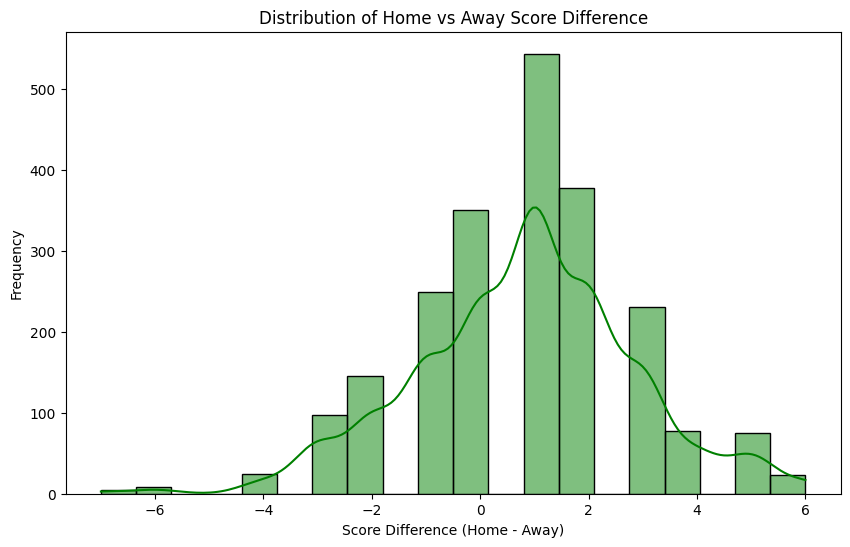

In [156]:
df['Score_Difference'] = df['Home_Score'] - df['Away_Score']

# Distribution of Score Difference
plt.figure(figsize=(10, 6))
sns.histplot(df['Score_Difference'], kde=True, bins=20, color='green')
plt.title('Distribution of Home vs Away Score Difference')
plt.xlabel('Score Difference (Home - Away)')
plt.ylabel('Frequency')
plt.show()

#### Penalties vs Match Outcome

In [157]:
df['Penalties_Flag'] = df['Penalties'].apply(lambda x: 'YES' if 'YES' in x else 'NO')



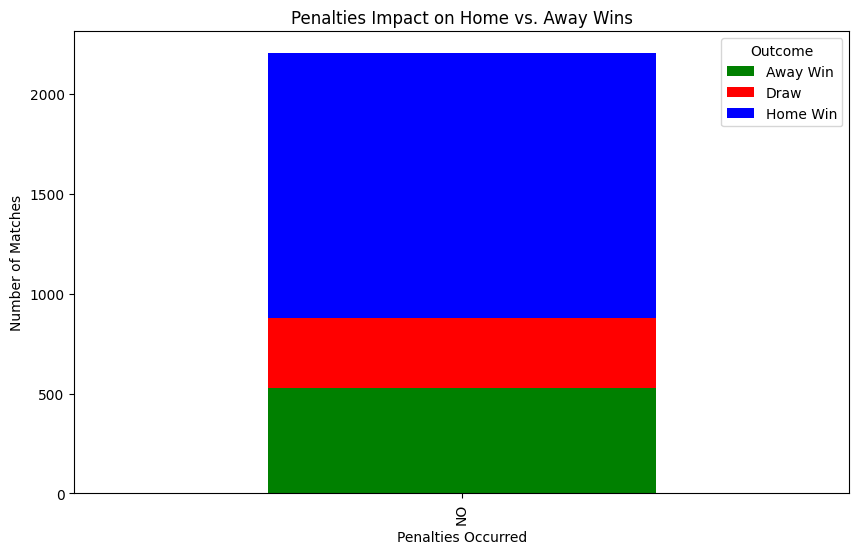

In [158]:
penalty_outcome = df.groupby(['Penalties_Flag', 'Outcome']).size().unstack(fill_value=0)

penalty_outcome.plot(kind='bar', stacked=True, figsize=(10, 6), color=['green', 'red', 'blue'])
plt.title('Penalties Impact on Home vs. Away Wins')
plt.ylabel('Number of Matches')
plt.xlabel('Penalties Occurred')
plt.show()

Home_Score, Away_Score, Goal_Time, and Attendance

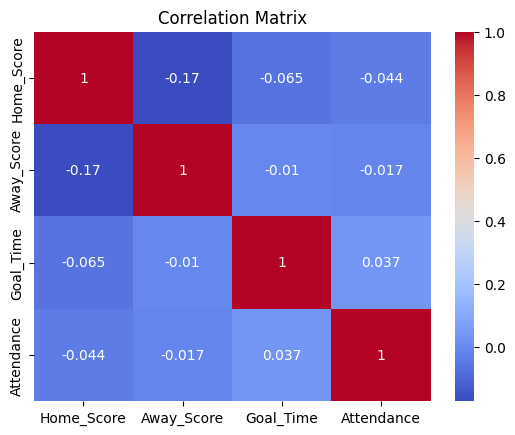

In [159]:
correlation_matrix = df[['Home_Score', 'Away_Score', 'Goal_Time', 'Attendance']].corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()


Attendance vs Match Outcome

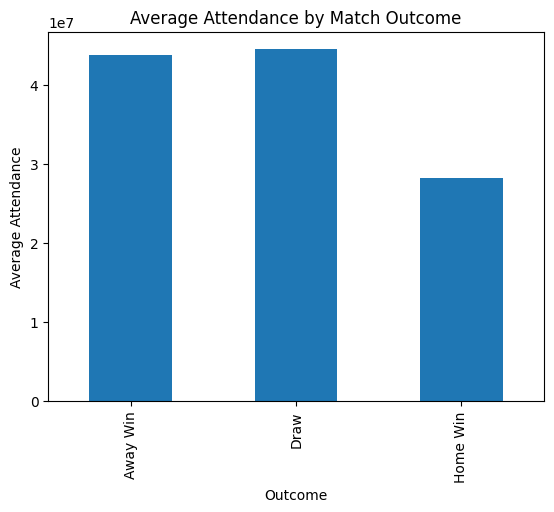

In [160]:
attendance_outcome = df.groupby('Outcome')['Attendance'].mean()
attendance_outcome.plot(kind='bar', title='Average Attendance by Match Outcome')
plt.ylabel('Average Attendance')
plt.show()


City Influence on Attendance

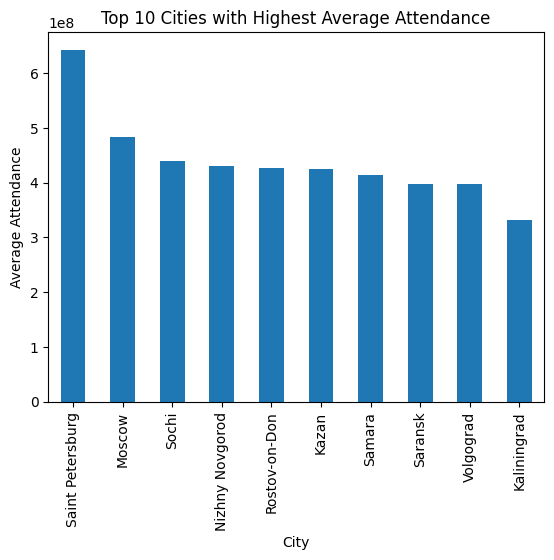

In [161]:
city_attendance = df.groupby('City')['Attendance'].mean().sort_values(ascending=False).head(10)
city_attendance.plot(kind='bar', title='Top 10 Cities with Highest Average Attendance')
plt.ylabel('Average Attendance')
plt.show()
